## **Data Dictionary**

Variable | Definition

ID | Unique Application ID

Office_PIN | PINCODE of Fintro's Offices

Application_Receipt_Date | Date of Application

Applicant_City_PIN | PINCODE of Applicant Address

Applicant_Gender | Applicant's Gender

Applicant_BirthDate | Applicant's Birthdate

Applicant_Marital_Status | Applicant's Marital Status

Applicant_Occupation | Applicant's Occupation

Applicant_Qualification | Applicant's Educational 
Qualification


Manager_DOJ | Manager's Date of Joining


Manager_Joining_Designation | Manager's Joining 
Designation in Fintro

Manager_Current_Designation | Manager's Designation at 
the time of application sourcing

Manager_Grade | Manager's Grade in Fintro

Manager_Status | Current Employment Status (Probation / Confirmation)

Manager_Gender | Manager's Gender

Manager_DoB | Manager's Birthdate

Manager_Num_Application | No. of Applications sourced in last 3 months by the Manager

Manager_Num_Coded | No. of agents recruited by the manager in last 3 months

Manager_Business | Amount of business sourced by the manager in last 3 months

Manager_Num_Products | Number of products sold by the manager in last 3 months

Manager_Business2 | Amount of business sourced by the manager in last 3 months excluding business from their Category A advisor

Manager_Num_Products2 | Number of products sold by the manager in last 3 months excluding business from their Category A advisor

Business_Sourced(Target) | Business sourced by applicant within 3 months [1/0] of recruitment

**HYPOTHESIS GENERATION**

*  Does Applicant gender have a significant impact on Business Source? 
*  Does Applicant_Marital_Status have a significant impact on Business Source? 
*  Does Manager Gender have a significant impact on Business Source? 
*  Does Applicant Occupation have a significant impact on Business Source?
*  Does Applicant Qualification have a significant impact on Business Source?
*  Does Manager joining designation have a significant impact on Business Source?
*  Does Manager Current designation have a significant impact on Business Source?
*  Does Manager Grade have a significant impact on Business Source?
*  Does Manager Status have a significant impact on Business Source?
*  Does Manager Num_Application have a significant impact on Business Source?
*  Does Manager Num_Coded have a significant impact on Business Source?
*  Does Applicant_Occupation have a significant impact on Manager_Gender?
*  Does Manager Current designation have a significant impact on Manager Joining Designation?
*  Does Applicant Occupation have a significant impact on manager joining designation?
*  Does Applicant Occupation have a significant impact on manager Current designation?
*  Does Applicant Marital Status have a significant impact on manager Current designation?
*  Does Manager Status have a significant impact on manager Current designation?
*  Does Manager_Num_Application have a significant impact on Applicant Occupation?
*  Does Manager_Num_Coded have a significant impact on Applicant Occupantion?
*   Does Applicant Age and Manager Gender have a significant Impact on Business Source?
*   Does Applicant Age and Manager Joining Status have a significant impact on Business Source?
*   Does Applicant Age and Manager Current Status have a significant impact on Business Source?
*   Does Applicant Age and Manager Status have a significant impact on Business Source?
*   Does Manager Business and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num_Product and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num_Product and Manager Current Designation have a significant impact on Business Source?
*   Does Manager Grade and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num Application and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num Coded and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Business and Applicant Occupation have a significant impact on Business Source?
*   Does Applicant Age and Applicant Occupation have a significant impact on Business Source?
*   Does Applicant Age and Applicant Gender have a significant impact on Business Source?
*   Does Applicant Age and Applicant Qualification have a significant impact on Business Source?
*   Does Applicant Age and Applicant Marital Status have a significant impact on Business Source?
*   Does Num_Products and Applicant Occupation have a significant impact on Business Source?
*   Does  Num_Products and Applicant Qualification have a significant impact on Business Source?
*   Does  Num_Products and Applicant Marital Status have a significant impact on Business Source?
*   Does Applicant Age and Manager Num Application have a significant impact on Business Source?
*   Does Applicant Age and Manager Num Coded have a significant impact on Business Source?
*   Does Applicant Age and Manager Grade have a significant impact on Business Source?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
import pylab as p
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
from scipy.stats import chi2
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
df = pd.read_csv('/content/agent_recruitment.csv')

In [4]:
df.head()

ID  Office_PIN  ... Manager_Num_Products2  Business_Sourced
0  FIN1000001      842001  ...                  28.0                 0
1  FIN1000002      842001  ...                  28.0                 1
2  FIN1000003      800001  ...                  24.0                 0
3  FIN1000004      814112  ...                  22.0                 0
4  FIN1000005      814112  ...                  17.0                 0

[5 rows x 23 columns]

### **TREATING MISSING VALUES**

In [5]:
(df.isnull().sum()/df.shape[0])*100

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              1.018159
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64

In [6]:
df['Unique_Manager'] = df['Manager_DOJ'] + df['Manager_DoB']
df['Manager_Business_A'] = df['Manager_Business']-df['Manager_Business2']
df['Manager_Num_Products_A'] = df['Manager_Num_Products'] - df['Manager_Num_Products2']

In [7]:
df['Applicant_BirthDate'] = pd.to_datetime(df['Applicant_BirthDate'])
df['Application_Receipt_Date'] = pd.to_datetime(df['Application_Receipt_Date'])
df['Manager_DoB'] = pd.to_datetime(df['Manager_DoB'])
df['Manager_DOJ'] = pd.to_datetime(df['Manager_DOJ'])

In [8]:
df['Applicant_City_PIN'] = df['Applicant_City_PIN'].fillna(method='pad').astype(int)
df['Applicant_Gender'] = df['Applicant_Gender'].fillna(df['Applicant_Gender'].mode()[0])
df['Applicant_Marital_Status'] = df['Applicant_Marital_Status'].fillna(df['Applicant_Marital_Status'].mode()[0])
df['Applicant_Occupation'] = df['Applicant_Occupation'].fillna(df['Applicant_Occupation'].mode()[0]) 
df['Applicant_BirthDate'] = df['Applicant_BirthDate'].fillna(df['Applicant_BirthDate'].mode()[0])
df.Applicant_Qualification = df['Applicant_Qualification'].fillna(df['Applicant_Qualification'].mode()[0])
df['Applicant_Age'] = ((df['Application_Receipt_Date'] - df['Applicant_BirthDate'])/ np.timedelta64(1, 'Y'))
df = df.fillna(1)

In [9]:
df.head()

ID  Office_PIN  ... Manager_Num_Products_A  Applicant_Age
0  FIN1000001      842001  ...                    0.0      35.324476
1  FIN1000002      842001  ...                    0.0      24.159291
2  FIN1000003      800001  ...                    0.0      41.246569
3  FIN1000004      814112  ...                    0.0      19.198204
4  FIN1000005      814112  ...                    0.0      21.782788

[5 rows x 27 columns]

### **TYPECASTING**

In [10]:
numerical = ['Business_Sourced','Applicant_Age','Office_PIN','Applicant_City_PIN','Manager_Grade','Manager_Num_Application','Manager_Num_Coded','Manager_Business','Manager_Num_Products','Manager_Business2','Manager_Num_Products2','Manager_Business_A','Manager_Num_Products_A']

In [11]:
for i in numerical:
  df[i] = df[i].astype(int)

In [12]:
numerical = df.select_dtypes(include=['int64','float64'][:])

In [13]:
numerical.dtypes

Office_PIN                 int64
Applicant_City_PIN         int64
Manager_Grade              int64
Manager_Num_Application    int64
Manager_Num_Coded          int64
Manager_Business           int64
Manager_Num_Products       int64
Manager_Business2          int64
Manager_Num_Products2      int64
Business_Sourced           int64
Manager_Business_A         int64
Manager_Num_Products_A     int64
Applicant_Age              int64
dtype: object

In [14]:
for j,i in enumerate(df): 
  if(df[i].dtype=='object'):
    df[i] = df[i].astype('category')

In [15]:
categorical = df.select_dtypes(include=['category'][:])

In [16]:
categorical.dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_DOJ                    category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Status                 category
Manager_Gender                 category
Manager_DoB                    category
Unique_Manager                 category
dtype: object

### **UNIVARIATE ANALYSIS**

In [17]:
group1 = ['Applicant_Age','Manager_Grade','Manager_Num_Application','Manager_Num_Coded','Business_Sourced']
group2 = ['Manager_Business','Manager_Business2','Manager_Business_A','Business_Sourced']
group3 = ['Manager_Num_Products','Manager_Num_Products2','Manager_Num_Products_A','Business_Sourced']

In [18]:
def uva(data,vargroup):
  size = len(vargroup)
  plt.figure(figsize = (10*size,5), dpi = 125)
  for j,i in enumerate(vargroup):
    max = data[i].max()
    min = data[i].min()
    range = [max,min]
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()
    mean = data[i].mean()
    median = data[i].median()
    std = data[i].std()
    point = mean-std, mean+std
    plt.subplot(1,size,j+1)
    sns.lineplot(point,[0,0],color='black',label='Standard Devistion')
    sns.kdeplot(data[i],shade=True)
    sns.scatterplot(mean,[0],color='yellow',label='mean')
    sns.scatterplot(median,[0],color='green',label='median')
    sns.scatterplot(range,[0,0],color='brown',label='min/max')
    plt.title('Skew={},Kurtosis={},variance={}\nmean={},median={}\nStandard Deviation={}'.format(round(skew,2),round(kurtosis,2),round(std**2,2),round(mean,2),median,round(std,2)))

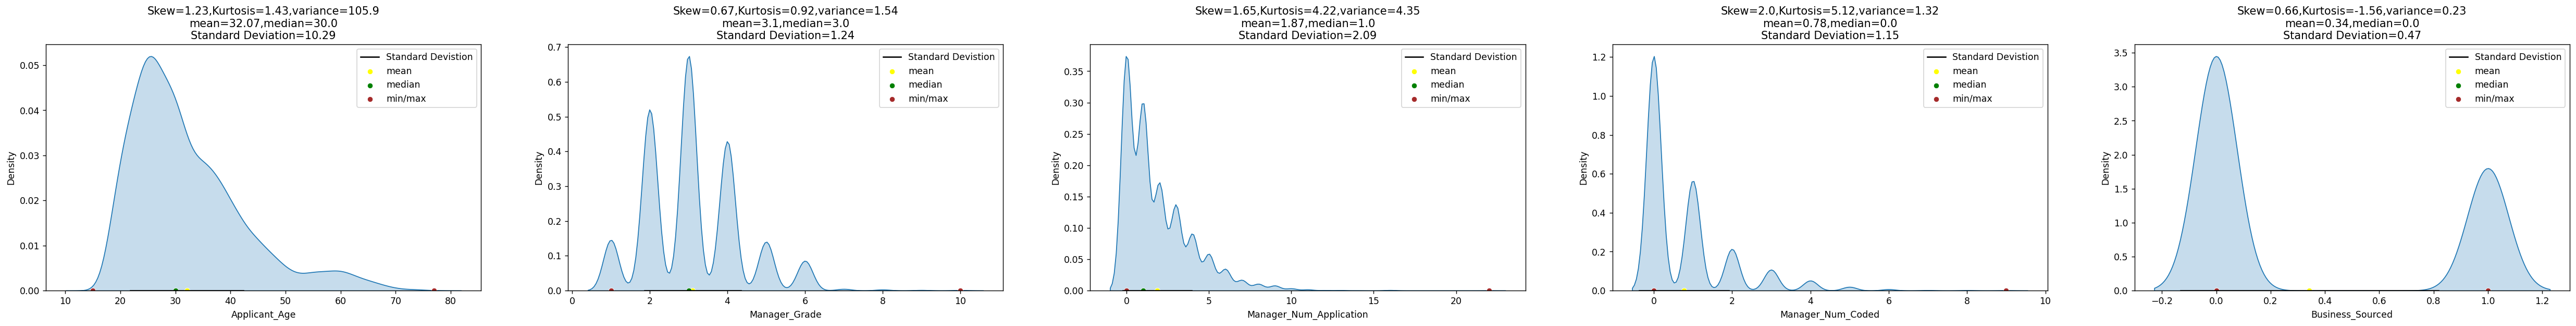

In [19]:
uva(df,group1)

OBSERVATION:
*   The median of Applicant Age is 30 and lies in the range 10-80 years which is well spreaded.
*    Manager Grade is unsymmetric and 6 peaks which is ordered categorical datatype.

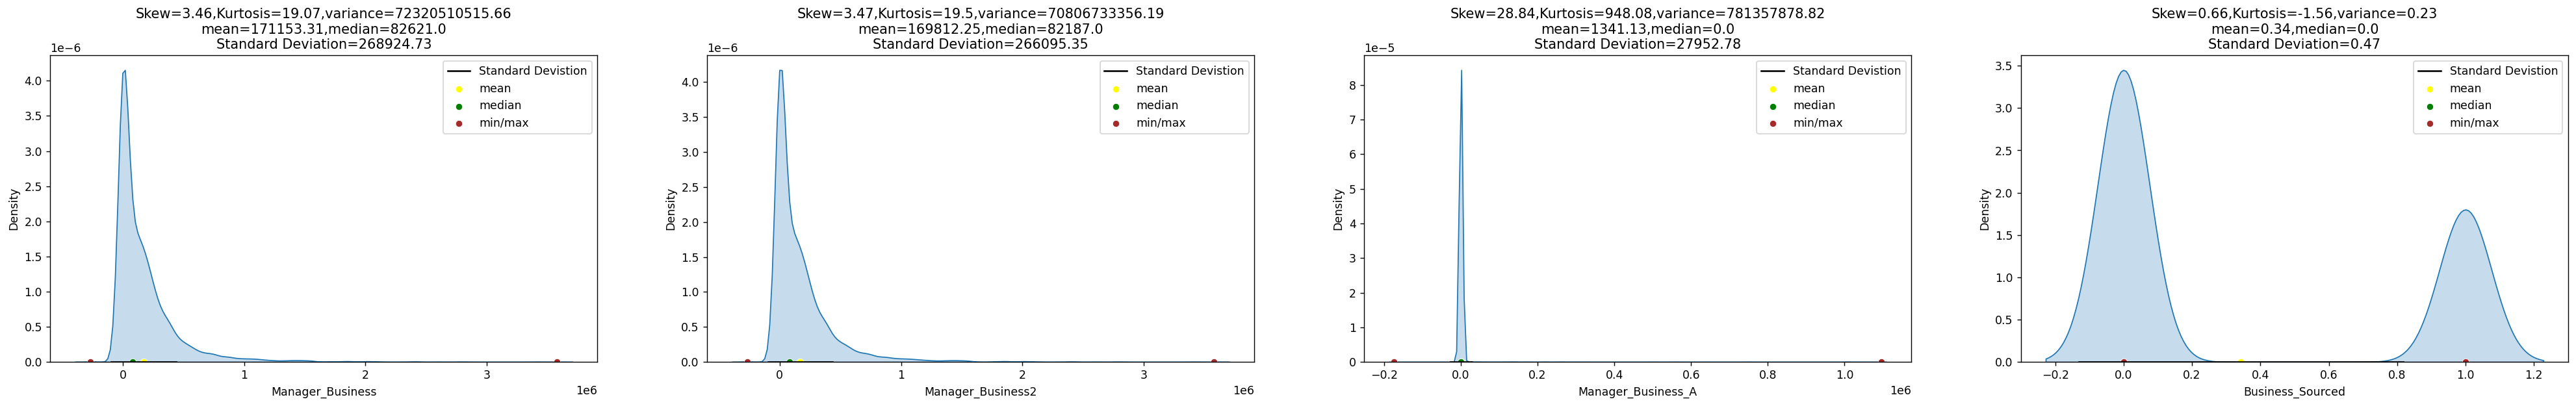

In [20]:
uva(df,group2)

OBSERVATION:
*   Manager Business and Manager Business 2 is right skewed with median smaller than mean with thicker tails.
*   Manager Business with category A has median ~0 and is unsymmetric.

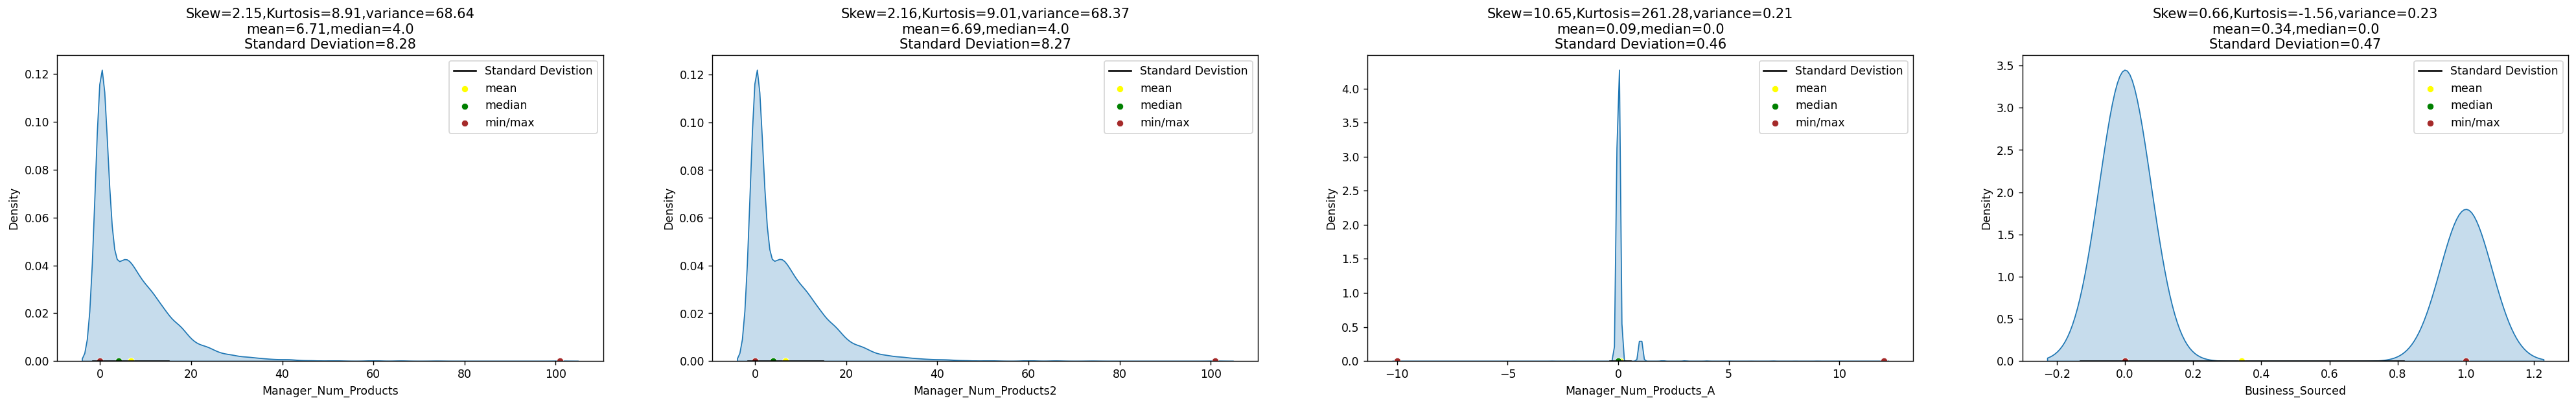

In [21]:
uva(df,group3)

In [22]:
def boxplot_numeric(data,vargroup,include_outlier=True):
  size = len(vargroup)
  plt.figure(figsize = (7*size,4), dpi = 100)
  for j,i in enumerate(vargroup):
    min = data[i].min()
    max = data[i].max()
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    left_whisker = q1-(1.5*iqr)
    right_whisker = q3+(1.5*iqr)
    median = data[i].median()
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()
    outlier_max = len(data[data[i]>right_whisker])
    outlier_min = len(data[data[i]<left_whisker])
    plt.subplot(1,size,(j+1))
    sns.boxplot(data[i])
    plt.title('Q1={},Q3={},IQR={}\nmedian={},skew={}\nKurtosis={},Outliers(max/min)={}'.format(round(q1,2),round(q3,2),round(iqr,2),median,round(skew,2),round(kurtosis,2),(outlier_max,outlier_min)))

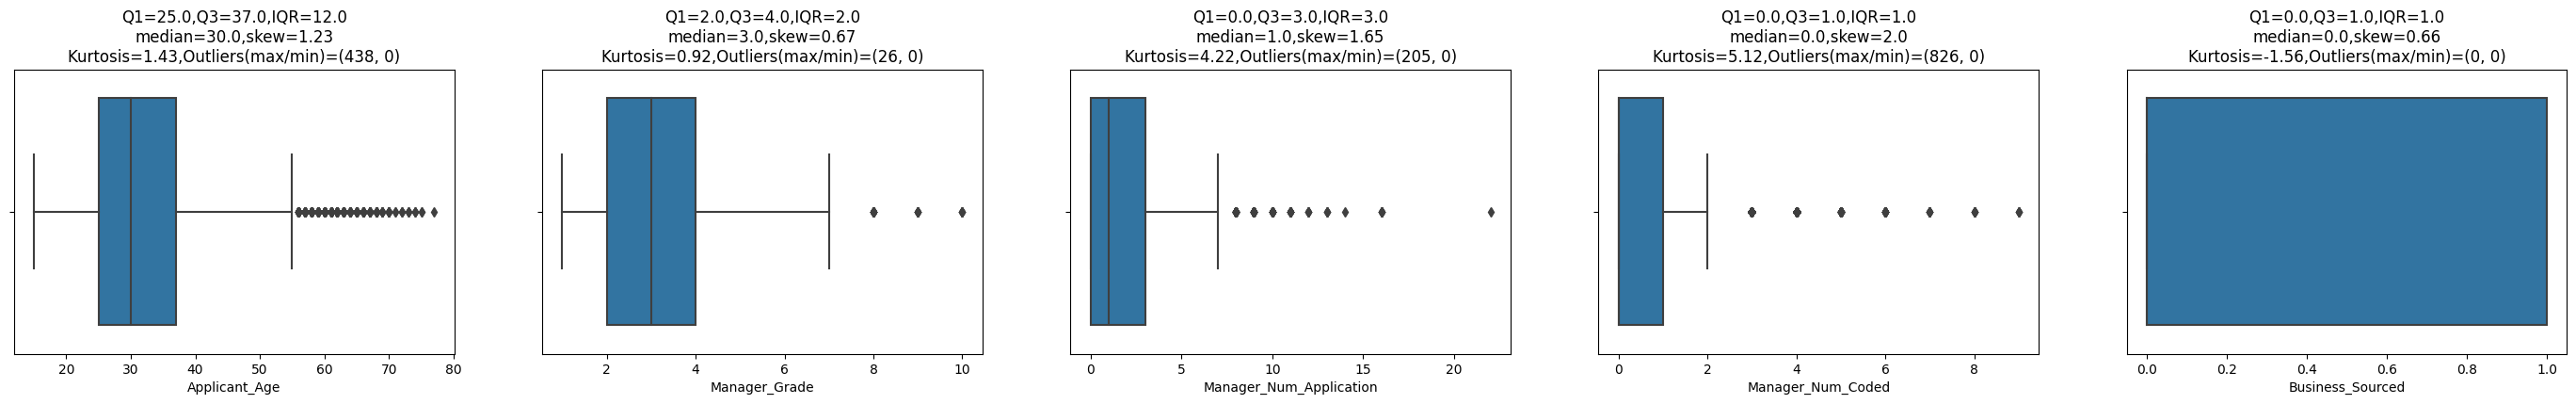

In [23]:
boxplot_numeric(df,group1)

OBSERVATION:
*   Applicant age has outliers present in the range 55-80.
*   Manager grade have an outlier in the range 8-10.
*   Manager_num_Application have outliers in the range 8-17.

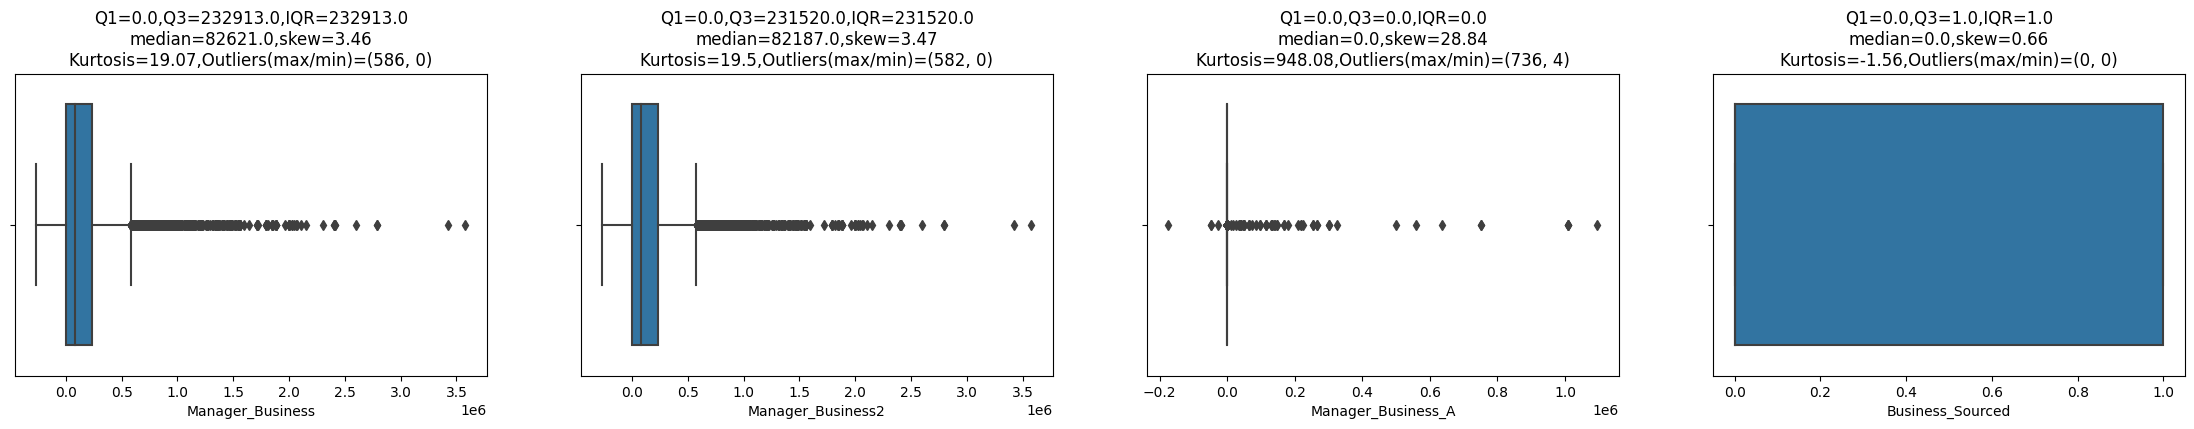

In [24]:
boxplot_numeric(df,group2)

OBSERVATION:

*   Manager_Business and manager_Business2 have an outlier beyond IQR in range 0.7 to 3.5.|


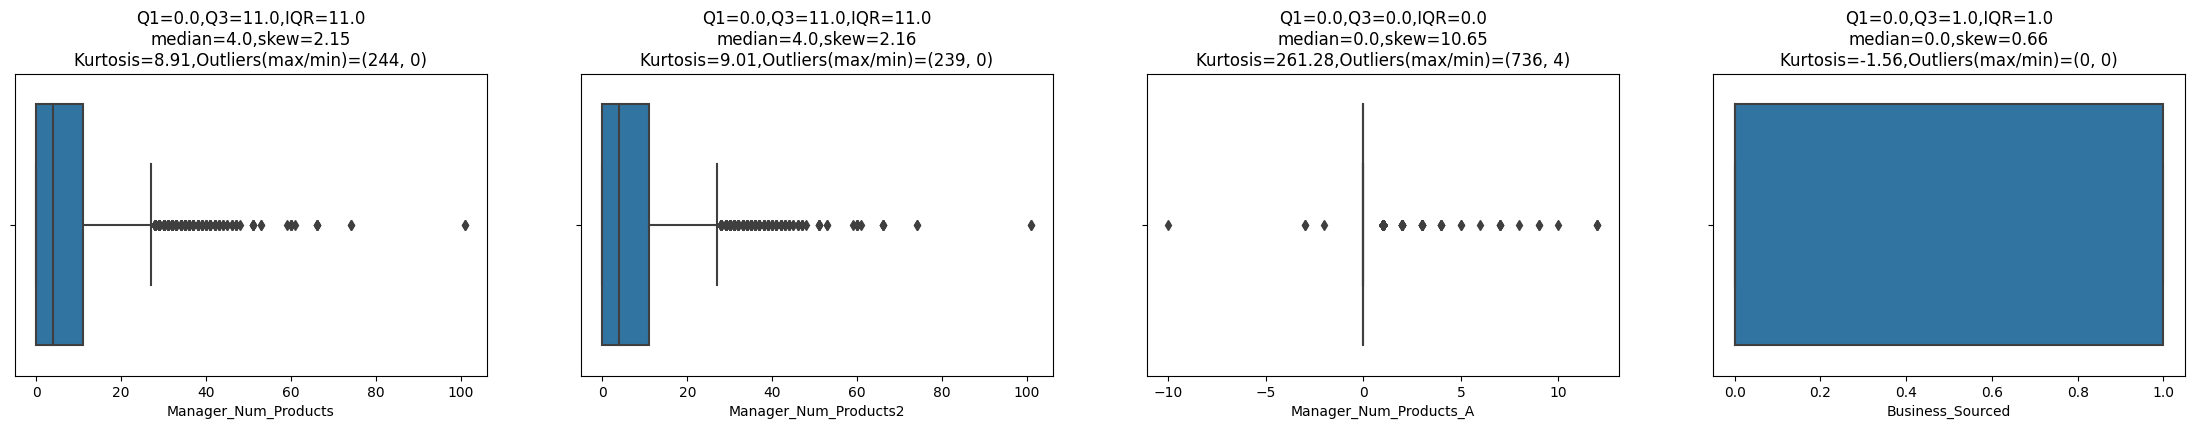

In [25]:
boxplot_numeric(df,group3)

In [26]:
categorical.dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_DOJ                    category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Status                 category
Manager_Gender                 category
Manager_DoB                    category
Unique_Manager                 category
dtype: object

In [27]:
group1 = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification']
group2 = ['Manager_Status','Manager_Status','Manager_Gender','Manager_Joining_Designation','Manager_Current_Designation']

In [28]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (12*size,8), dpi = 100)
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

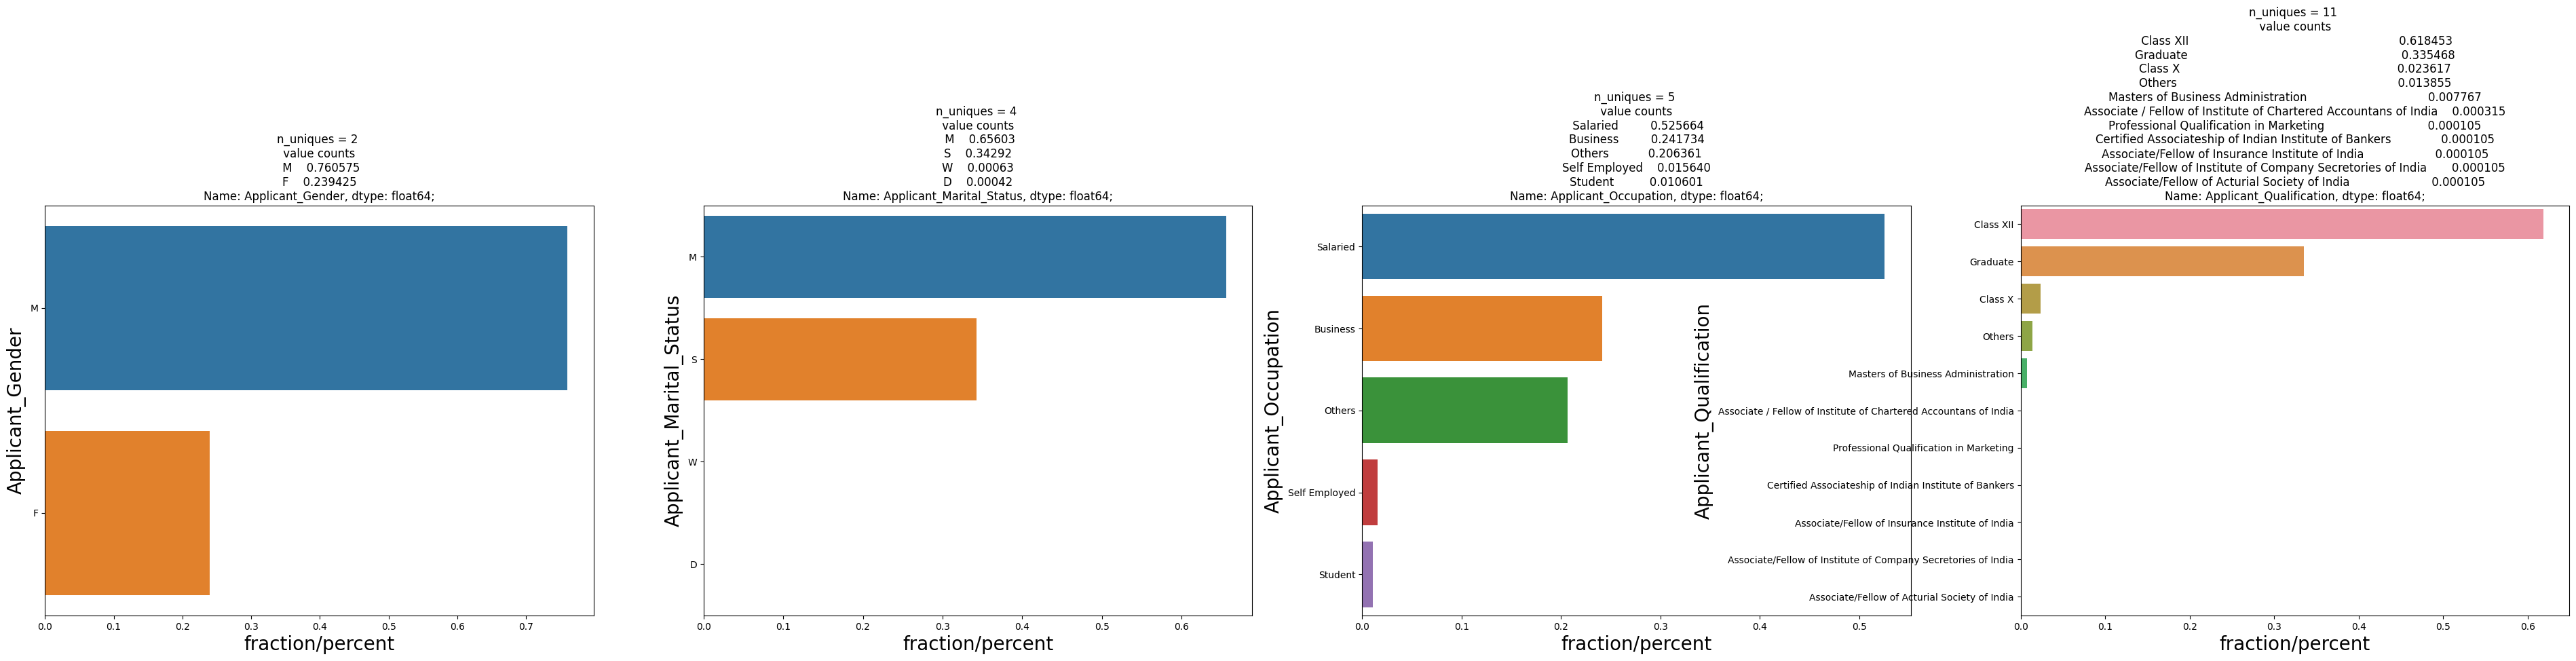

In [29]:
UVA_category(df,group1)

**OBSRVATION**:

*   Around **76%** of applicants are male and and rest **24%** applicant are female.
*   Around **65%** of applicant are married, **34%** of applicant are single, **0.6%** are widow and 0.4% are divorced.
*   Around **52%** of applicant occupation was salaried employees, **24%** of applicant were from business sector and rest **20%** applicant belonged from others.
*   Around **61%** of applicant have Class 12th Qualification,**33%** of them were graduates,around **2%** of them from class 10.

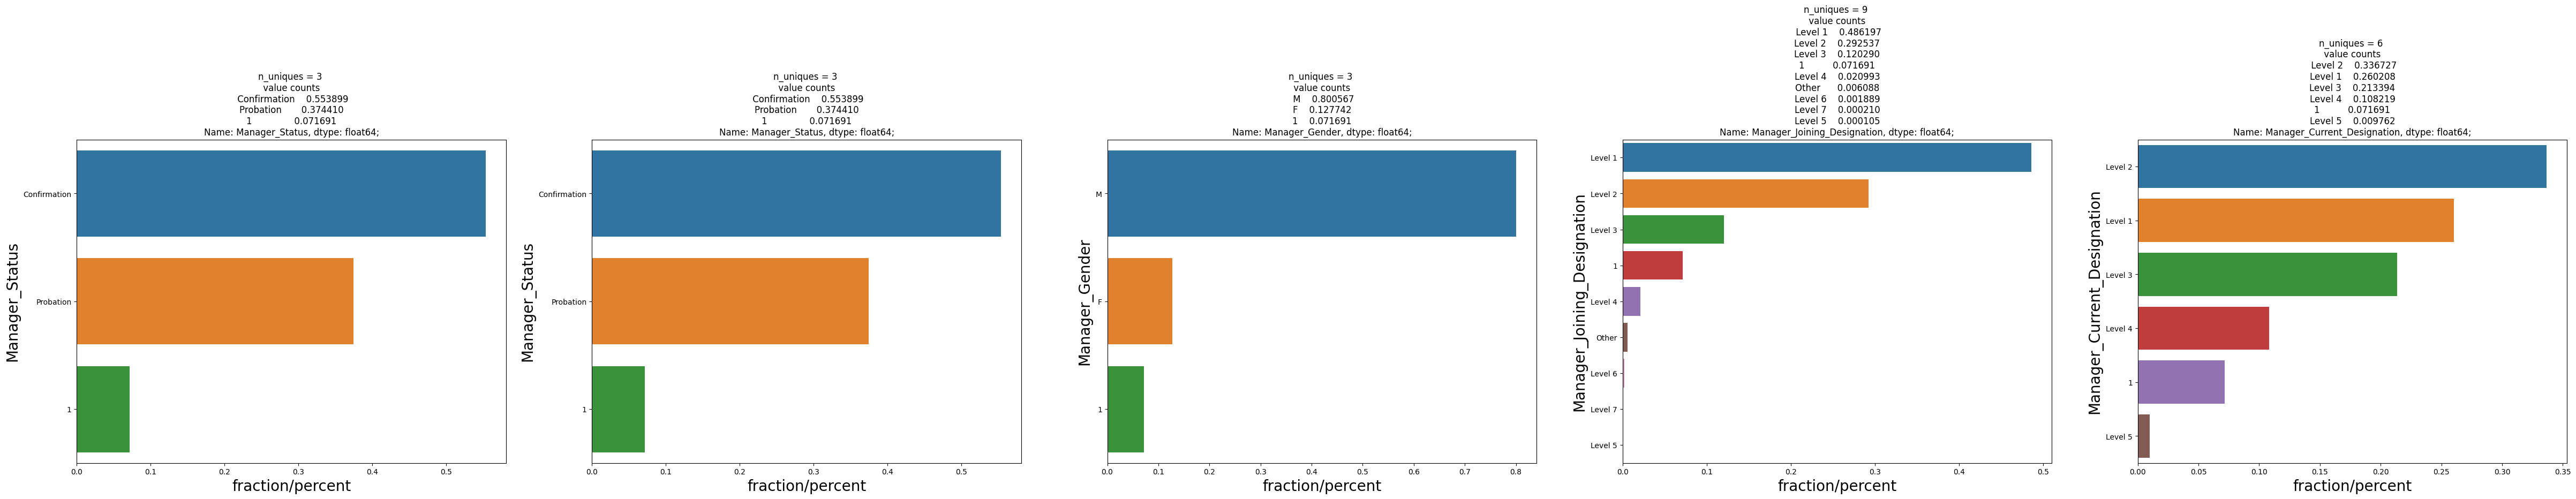

In [30]:
UVA_category(df,group2)

**OBSERVATION:**
*   Around **55%** of manager have confirmed status, **37%** of manager are in probation and **7%** of managers details are missing.
*   Around **80%** of manager are male, **12%** of managers are female.
*   Around **48%** of managers when joined are of level1, **29%** of managers when joined are of level 2,**12%** of managers when joined are of level3.
*  Around **33%** of managers currently are of level2 , **26%** of managers currently of level1 and **21%** of managers are in level3.

In [31]:
df['Applicant_Age_range'] = 'str'
df['Applicant_Age_range'][(df['Applicant_Age']<= 25)] = 'Young Applicant'
df['Applicant_Age_range'][(df['Applicant_Age']> 25) & (df['Applicant_Age']>= 45)] = 'Middle-Aged Applicant'
df['Applicant_Age_range'][(df['Applicant_Age']>45)] = 'Old-aged Applicant'

df['Cat_Manager_Business'] = 'str'
df['Cat_Manager_Business'][(df['Manager_Business']<=100000)] = 'Low_Amount_Sourced'
df['Cat_Manager_Business'][(df['Manager_Business']>100000) & (df['Manager_Business']<=300000)] = 'Medium_Amount_Sourced'
df['Cat_Manager_Business'][(df['Manager_Business']>300000) & (df['Manager_Business']<=500000)] = 'High_Amount_Sourced'
df['Cat_Manager_Business'][(df['Manager_Business']>500000)] = 'Highest_Amount_Sourced'

df['Cat_Num_Products'] = 'str'
df['Cat_Num_Products'][(df['Manager_Num_Products']<=10)] = 'Less_Products_Sold'
df['Cat_Num_Products'][(df['Manager_Num_Products']>10) & (df['Manager_Num_Products']<=30)] = 'Medium_Products_Sold'
df['Cat_Num_Products'][(df['Manager_Num_Products']>30)] = 'Higher_Products_Sold'

df['Cat_Manager_Grade'] = 'str'
df['Cat_Manager_Grade'][(df['Manager_Grade']<=2)] = 'Low_Grade'
df['Cat_Manager_Grade'][(df['Manager_Grade']>2) & (df['Manager_Grade']<=4)] = 'Medium_Grade'
df['Cat_Manager_Grade'][(df['Manager_Grade']>4)] = 'High_Grade'

df['Cat_Manager_Num_Coded'] = 'str'
df['Cat_Manager_Num_Coded'][(df['Manager_Num_Coded']<=2)] = 'Low'
df['Cat_Manager_Num_Coded'][(df['Manager_Num_Coded']>2)] = 'High'

df['Cat_Application_Sourced'] = 'str'
df['Cat_Application_Sourced'][(df['Manager_Num_Application']<=2)] = 'Less_Application_Sourced'
df['Cat_Application_Sourced'][(df['Manager_Num_Application']>2) & (df['Manager_Num_Application']<=5)] = 'Medium_Application_Sourced'
df['Cat_Application_Sourced'][(df['Manager_Num_Application']>5)] = 'High_Application_Sourced'

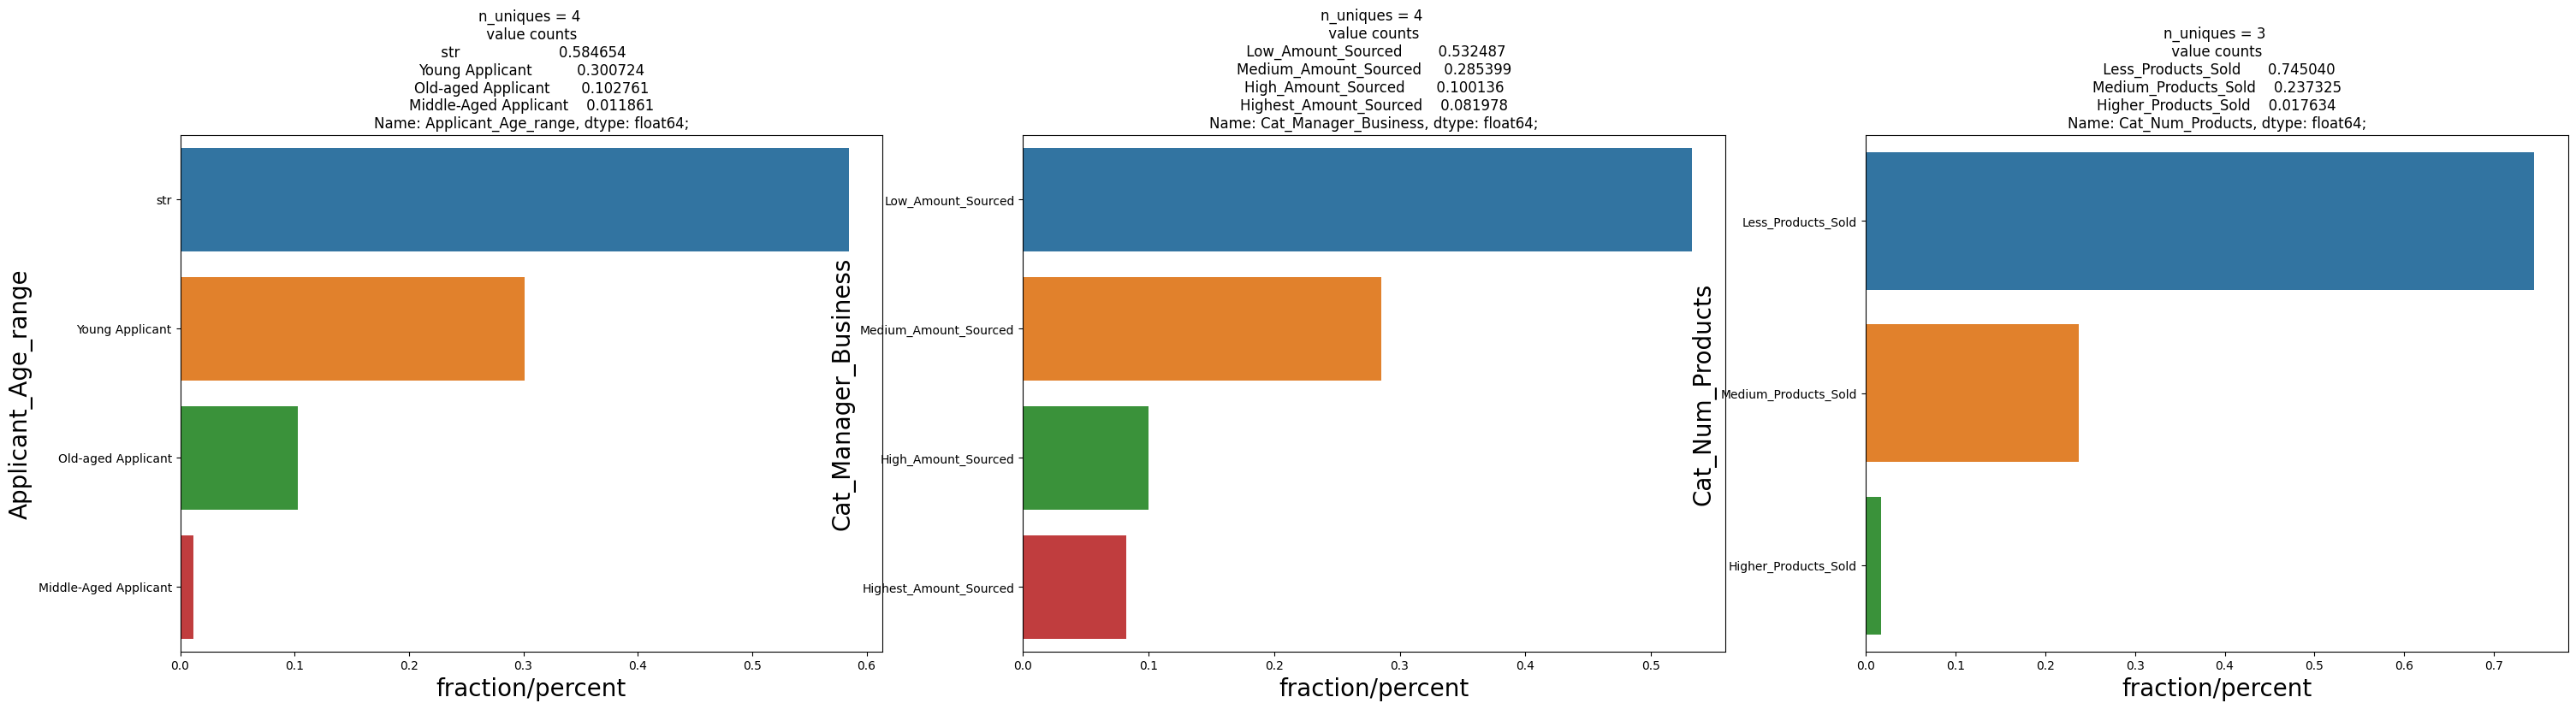

In [32]:
UVA_category(df,['Applicant_Age_range','Cat_Manager_Business','Cat_Num_Products'])

**OBSERVATION:**
*   Around 38% of applicant are young,around 10% of applicant are middle aged and rest are old aged applicant.
*   Around 53% of managers have low amount sourced,28% of managers have medium sourced,10% of both high amount sourced by manager in business.
*   Around 74% of manager have sold less products,23% of manager have sold average products and about 1% of manager have sold high no of products.

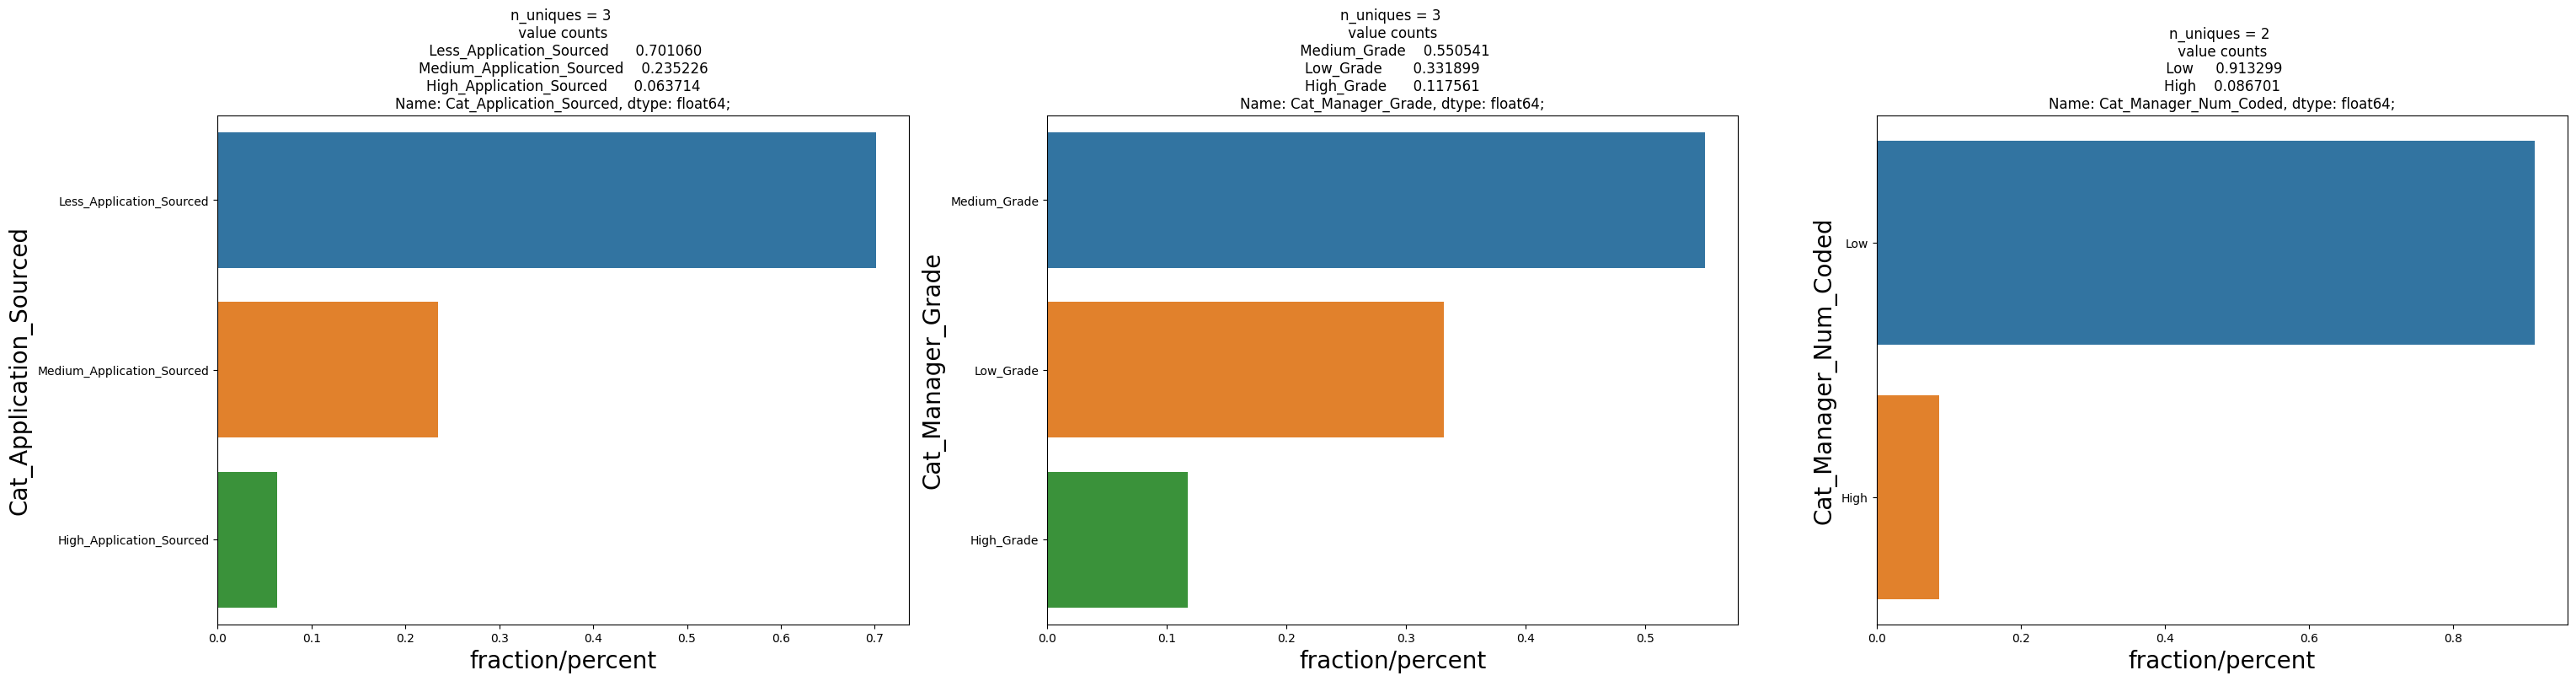

In [33]:
UVA_category(df,['Cat_Application_Sourced','Cat_Manager_Grade','Cat_Manager_Num_Coded'])

**OBSERVATION**
*  Around 55% of manager have medium grade, 33% of manager have low grade and 11% manager have high grade.
*  Around 91% of manager have high num_coded and 9% of managers have low num_coded.

### **BIVARIATE ANALYSIS**

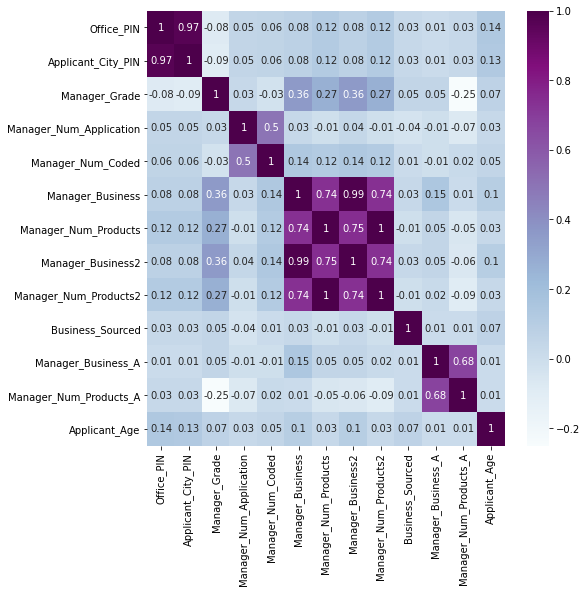

In [34]:
rounded = round(df.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

**OBSERVATION:**
*   Office_PIN AND Applicant_City_PIN have high relationship between them.
*   Manager business,Manager_Num_Products,Manager_Business2,mnager_Num_Products2 have high relationship between them.
*   Manager_Business_A,Manager_Num_Products_A have a high relationship between them.

<Figure size 840x560 with 0 Axes>

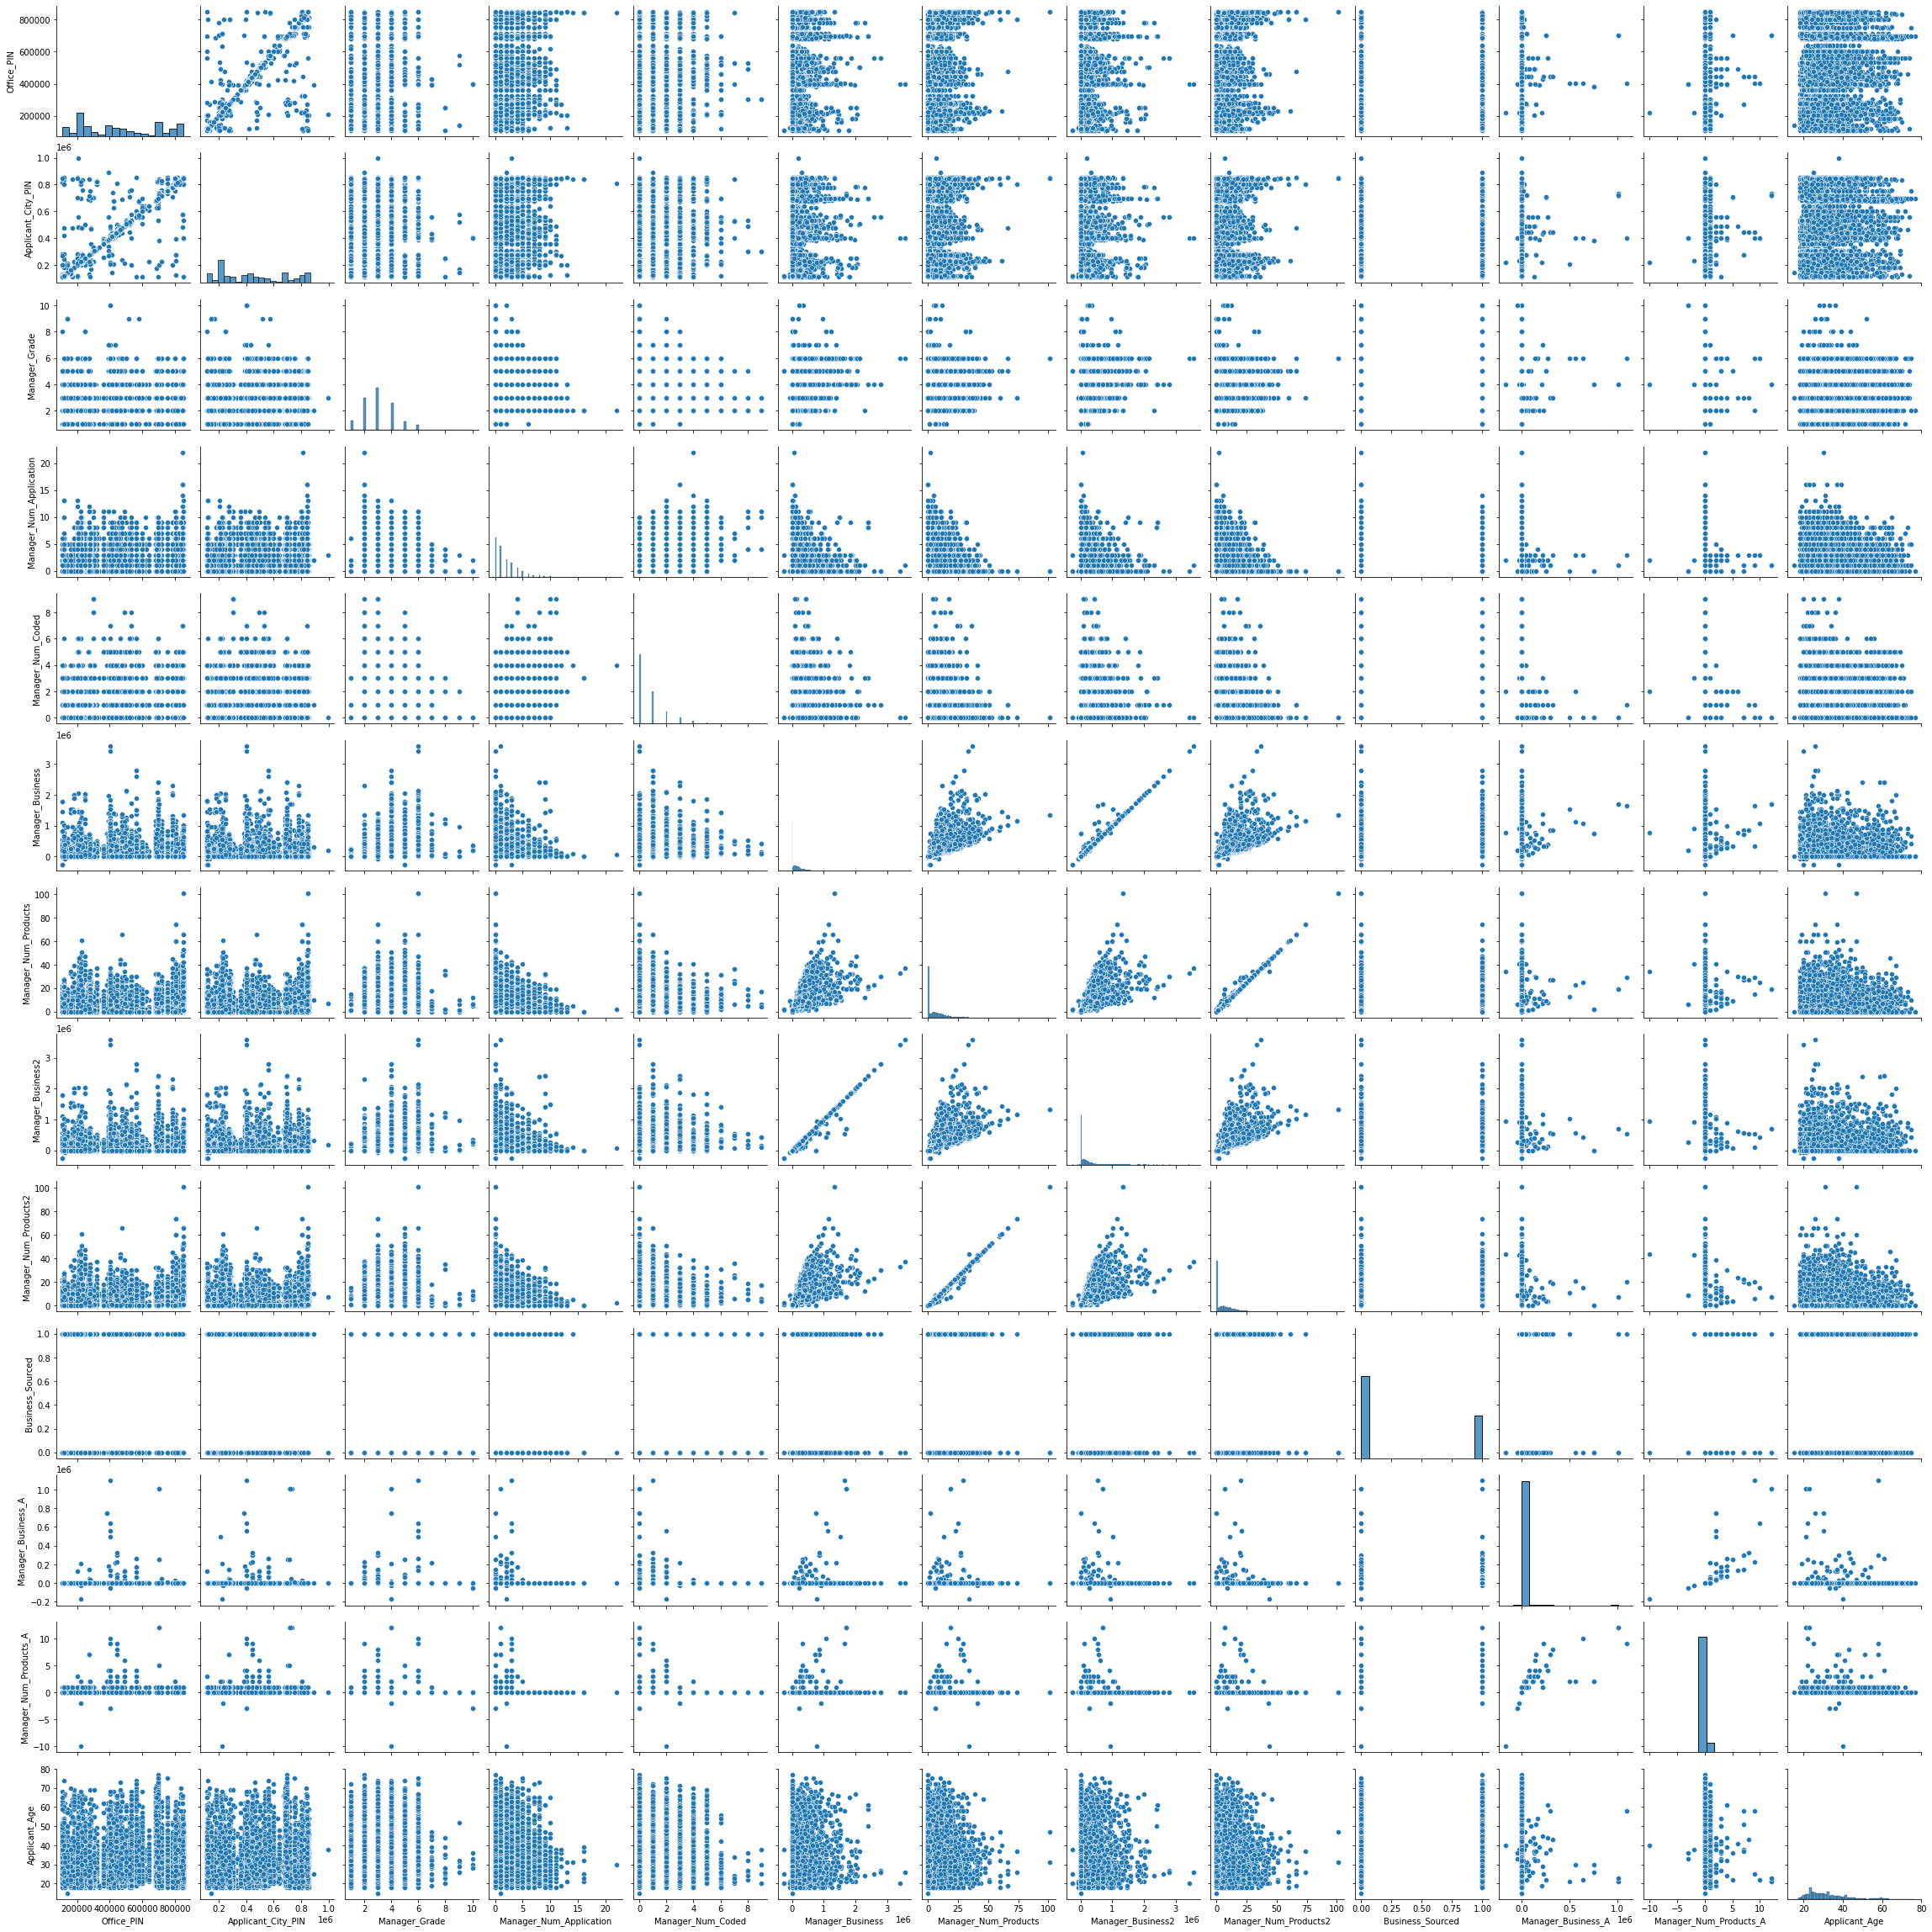

In [35]:
plt.figure(dpi=140)
sns.pairplot(data = df)

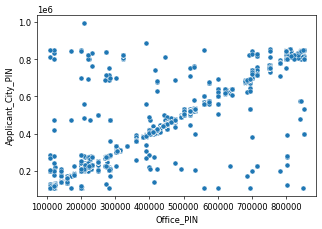

In [36]:
plt.figure(dpi=60)
sns.scatterplot(df['Office_PIN'], df['Applicant_City_PIN'])

**OBSERVATION:**
*   From scatterplot we get much clear on relationship between office pin and applicant city pin.

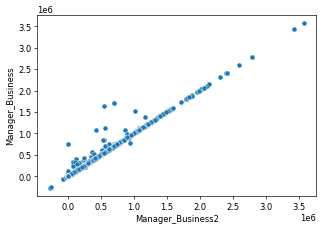

In [37]:
plt.figure(dpi=60)
sns.scatterplot(df['Manager_Business2'], df['Manager_Business'])

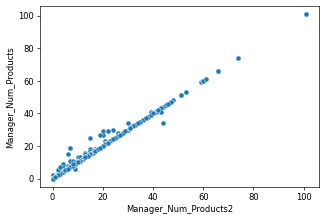

In [38]:
plt.figure(dpi=60)
sns.scatterplot(df['Manager_Num_Products2'], df['Manager_Num_Products'])

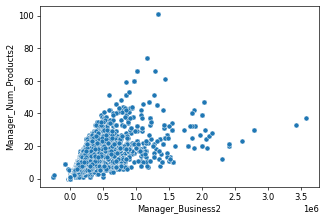

In [39]:
plt.figure(dpi=60)
sns.scatterplot(df['Manager_Business2'], df['Manager_Num_Products2'])

#### **CATEGORICAL-CATEGORICAL**

CHI-SQUARE-TESTING
*   Does Applicant gender have a significant impact on Business Source? 
*   Does Applicant_Marital_Status have a significant impact on Business Source? 
*   Does Manager Gender have a significant impact on Business Source? 
*   Does Applicant Occupation have a significant impact on Business Source?
*   Does Applicant Qualification have a significant impact on Business Source?
*   Does Manager joining designation have a significant impact on Business Source?
*   Does Manager Current designation have a significant impact on Business Source?
*   Does Manager Grade have a significant impact on Business Source?
*   Does Manager Status have a significant impact on Business Source?
*   Does Manager Num_Application have a significant impact on Business Source?
*   Does Manager Num_Coded have a significant impact on Business Source?
*   Does Applicant_Occupation have a significant impact on Manager_Gender?
*   Does Manager Current designation have a significant impact on Manager Joining Designation?
*   Does Applicant Occupation have a significant impact on manager joining designation?
*   Does Applicant Occupation have a significant impact on manager Current designation?
*   Does Applicant Marital Status have a significant impact on manager Current designation?
*   Does Manager Status have a significant impact on manager Current designation?
*   Does Manager_Num_Application have a significant impact on Applicant Occupation?
*    Does Manager_Num_Coded have a significant impact on Applicant Occupantion?

In [40]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

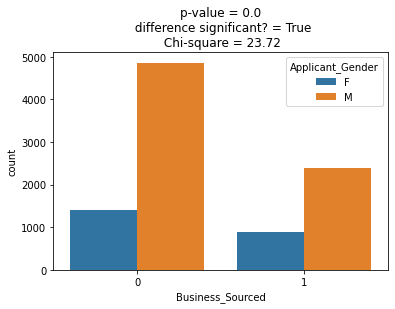

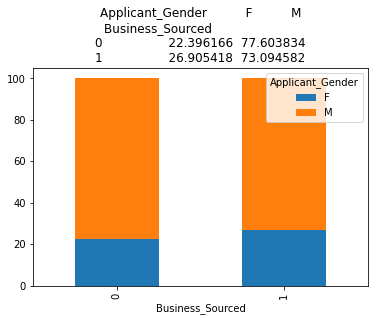

In [41]:
BVA_categorical_plot(df,'Applicant_Gender','Business_Sourced')

**OBSERVATON:**
*   Applicant gender have a significant impact on Business Source.
*   Applicant male is most likely get recruited.

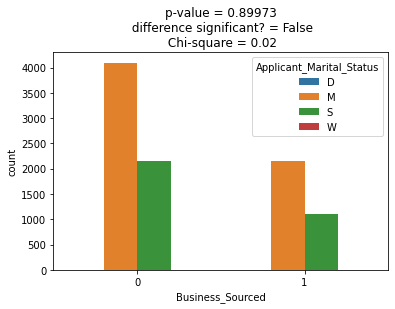

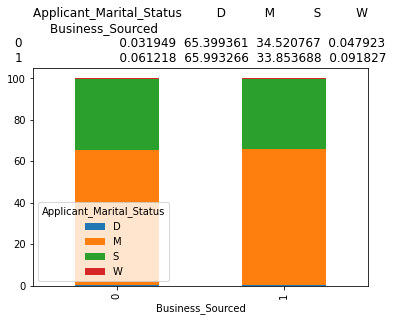

In [42]:
BVA_categorical_plot(df,'Applicant_Marital_Status','Business_Sourced')

**OBSERVATION:**

*   Applicant_Marital_Status does not have a significant impact on Business Source. 

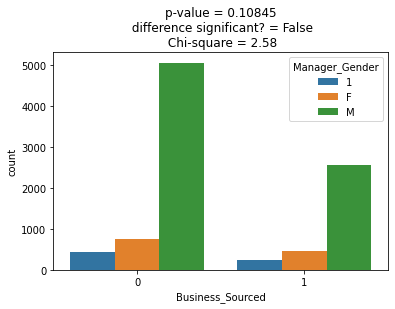

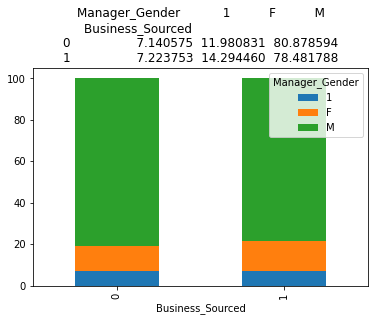

In [43]:
BVA_categorical_plot(df,'Manager_Gender','Business_Sourced')

**OBSERVATION:**
*   Manager Gender does not have a significant impact on Business Source

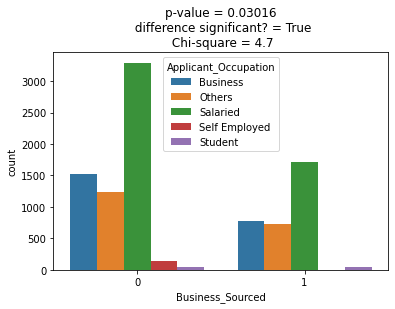

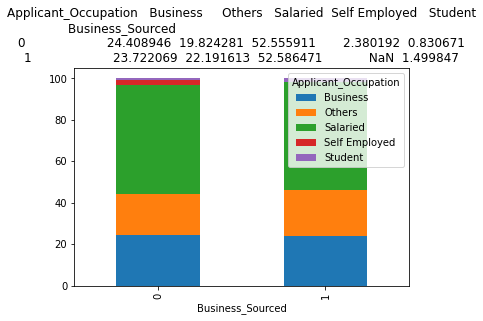

In [44]:
BVA_categorical_plot(df,'Applicant_Occupation','Business_Sourced')

**OBSERVATION:**
*  Applicant Occupation have a significant impact on Business Source.
* Salaried Applicant are most likely to get recruited.

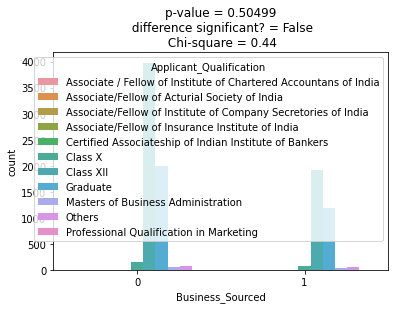

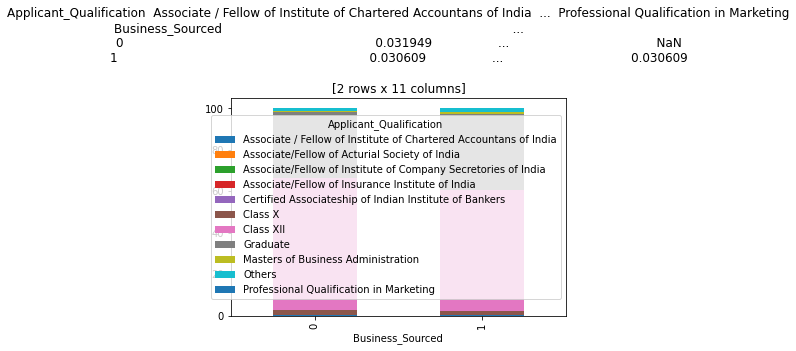

In [45]:
BVA_categorical_plot(df,'Applicant_Qualification','Business_Sourced')

**OBSERVATION:**
*  Applicant Qualification does not have have a significant impact on Business Source

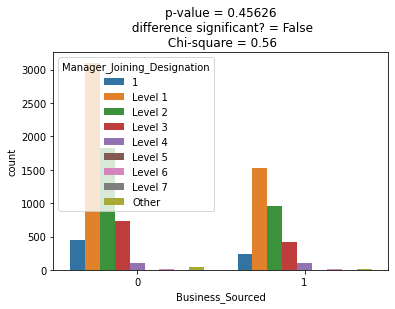

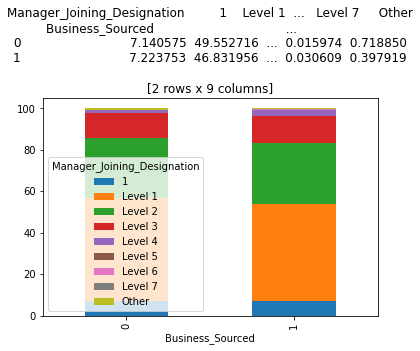

In [46]:
BVA_categorical_plot(df,'Manager_Joining_Designation','Business_Sourced')

OBSERVATION:
 Manager joining designation does not have a significant impact on Business Source

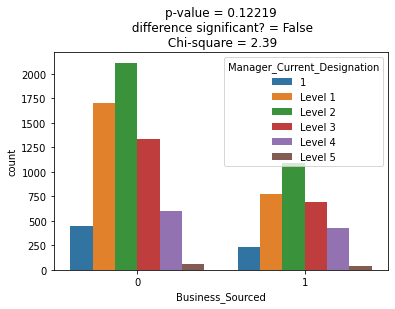

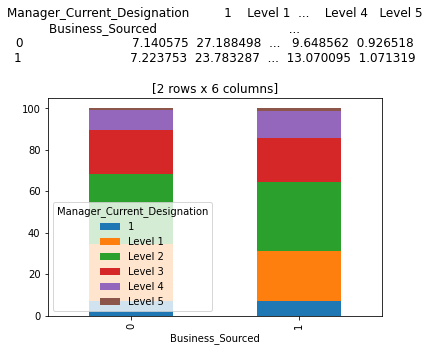

In [47]:
BVA_categorical_plot(df,'Manager_Current_Designation','Business_Sourced')

OBSERVATION:
Manager Current designation does not have have a significant impact on Business Source

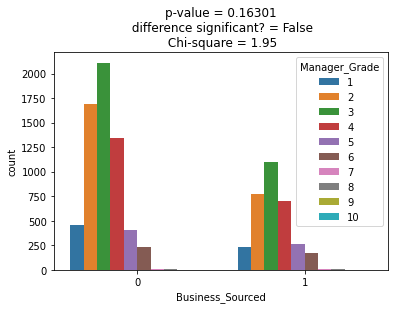

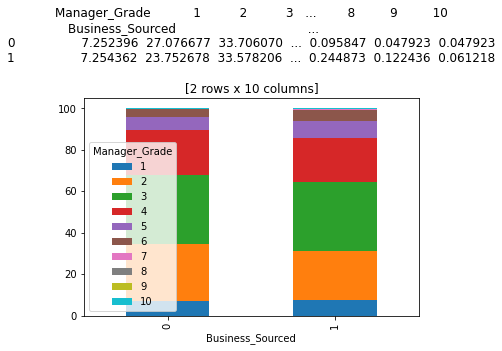

In [48]:
BVA_categorical_plot(df,'Manager_Grade','Business_Sourced')

**OBSERAVTION**
*  Does Manager Grade does not have a significant impact on Business Source

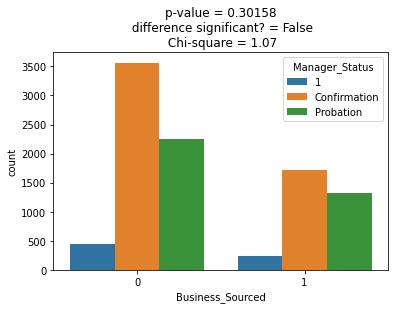

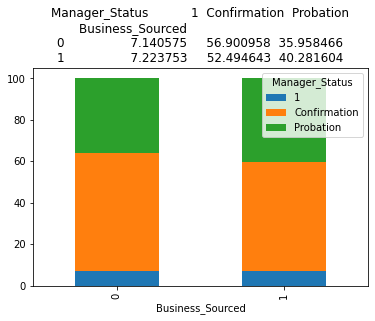

In [49]:
BVA_categorical_plot(df,'Manager_Status','Business_Sourced')

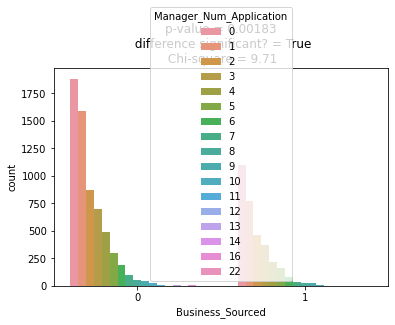

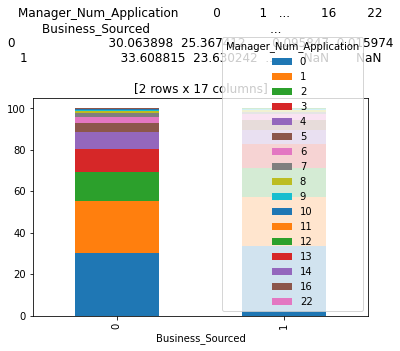

In [50]:
BVA_categorical_plot(df,'Manager_Num_Application','Business_Sourced')

**OBSERAVTION**:
*  Manager Num_Application have a significant impact on Business Source.

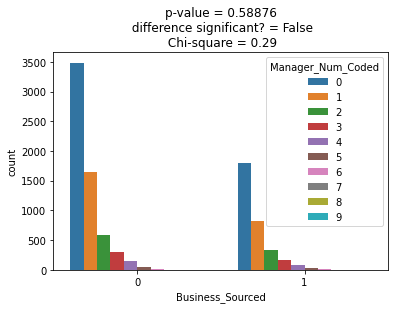

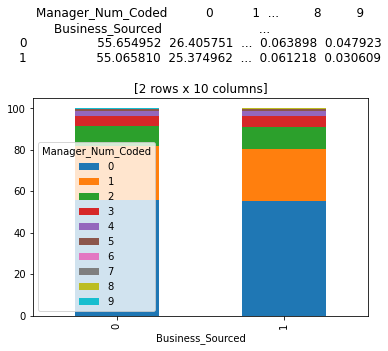

In [51]:
BVA_categorical_plot(df,'Manager_Num_Coded','Business_Sourced')

OBSERVATION:
Manager Num_Coded does not have a significant impact on Business Source

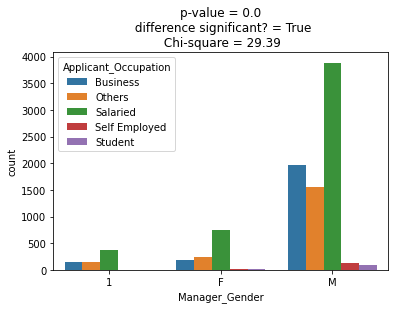

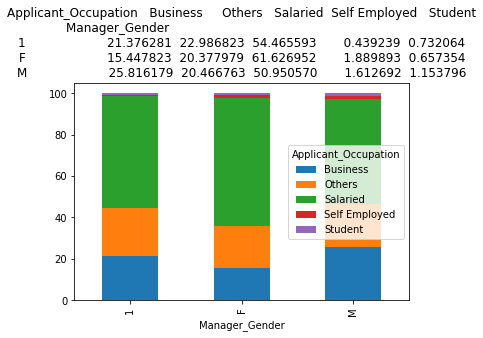

In [52]:
BVA_categorical_plot(df,'Applicant_Occupation','Manager_Gender')

OBSERVATION:
Manager Applicant_Occupation have a significant impact on Manager_Gender.

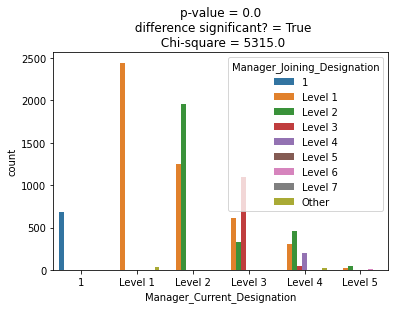

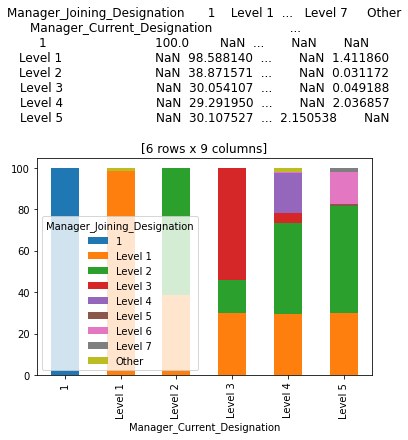

In [53]:
BVA_categorical_plot(df,'Manager_Joining_Designation','Manager_Current_Designation')

**OBSERVATION:**
Manager Current designation have a significant impact on Manager Joining Designation

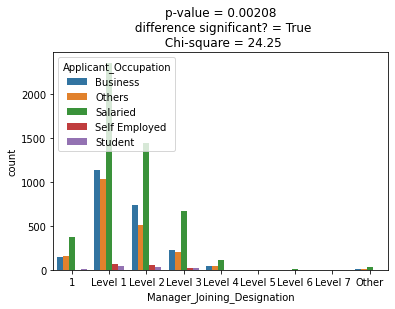

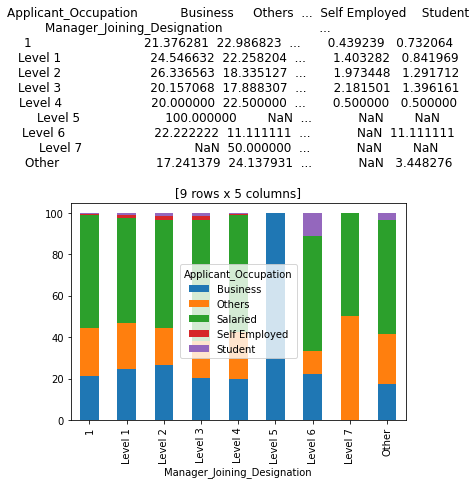

In [54]:
BVA_categorical_plot(df,'Applicant_Occupation','Manager_Joining_Designation')

**OBSERVATION:**
Applicant Occupation have a significant impact on manager Current designation

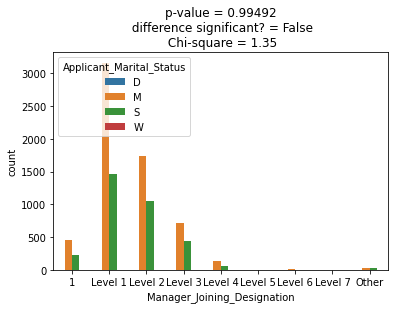

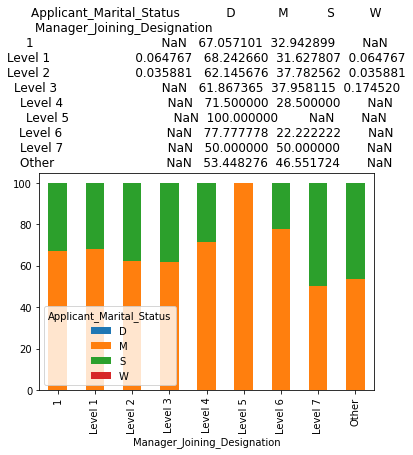

In [55]:
BVA_categorical_plot(df,'Applicant_Marital_Status','Manager_Joining_Designation')

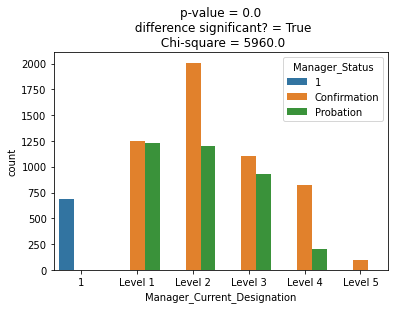

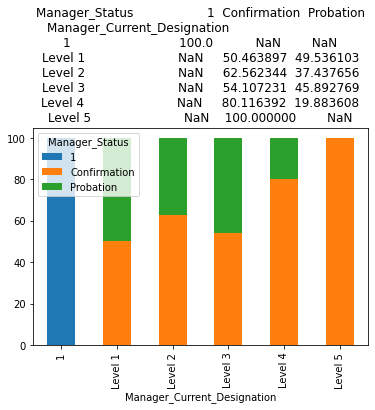

In [56]:
BVA_categorical_plot(df,'Manager_Status','Manager_Current_Designation')

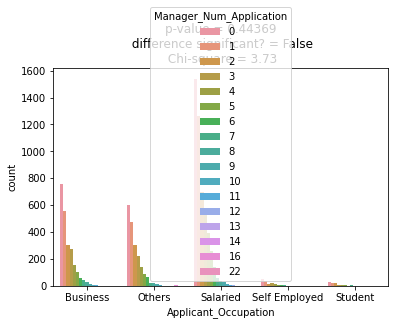

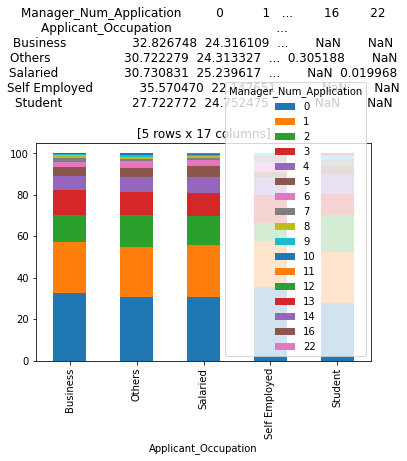

In [57]:
BVA_categorical_plot(df,'Manager_Num_Application','Applicant_Occupation')

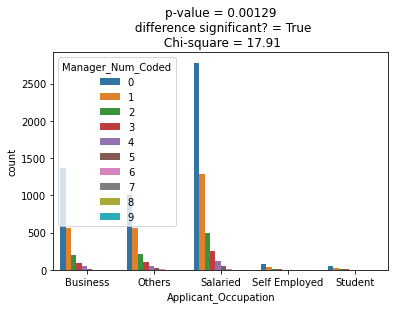

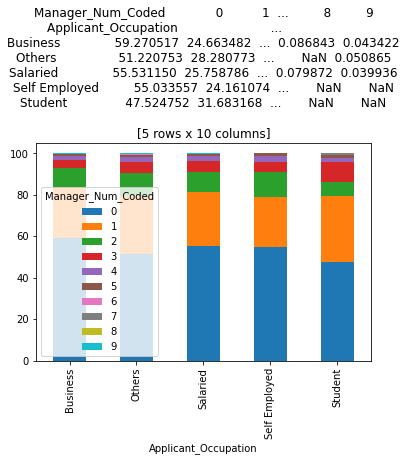

In [58]:
BVA_categorical_plot(df,'Manager_Num_Coded','Applicant_Occupation')

#### **NUMERICAL-CATEGORICAL**

In [59]:
df1 = df.copy()

In [60]:
categories = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification']

In [61]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in categories:
    df1[i] = label_encoder.fit_transform(df1[i])

Z-TEST & T-TEST

**LIST OF HYPOTHESIS:**
*   Does Applicant Age and Manager Gender have a significant Impact on Business Source?
*   Does Applicant Age and Manager Joining Status have a significant impact on Business Source?
*   Does Applicant Age and Manager Current Status have a significant impact on Business Source?
*   Does Applicant Age and Manager Status have a significant impact on Business Source?
*   Does Manager Business and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num_Product and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num_Product and Manager Current Designation have a significant impact on Business Source?
*   Does Manager Grade and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num Application and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Num Coded and Manager Joining Designation have a significant impact on Business Source?
*   Does Manager Business and Applicant Occupation have a significant impact on Business Source?
*   Does Applicant Age and Applicant Occupation have a significant impact on Business Source?
*   Does Applicant Age and Applicant Gender have a significant impact on Business Source?
*   Does Applicant Age and Applicant Qualification have a significant impact on Business Source?
*   Does Applicant Age and Applicant Marital Status have a significant impact on Business Source?
*   Does Num_Products and Applicant Occupation have a significant impact on Business Source?
*   Does  Num_Products and Applicant Qualification have a significant impact on Business Source?
*   Does  Num_Products and Applicant Marital Status have a significant impact on Business Source?
*   Does Applicant Age and Manager Num Application have a significant impact on Business Source?
*   Does Applicant Age and Manager Num Coded have a significant impact on Business Source?
*   Does Applicant Age and Manager Grade have a significant impact on Business Source?


In [121]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    over = (sigma1**2/N1) + (sigma2**2/N2)
    ovr_sigma = sqrt(over)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==data[category]][:]
  x2 = data[cont][~(data[cat]==data[category])][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (13,4), dpi=100)
  plt.subplot(1,4,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('n {}'.format(table))
  plt.subplot(1,4,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  plt.subplot(1,4,3)
  x_min = -200
  x_max = 200
  x = np.linspace(x_min, x_max, 100)
  y = norm.pdf(x, m2, std2)
  plt.xlim(x_min, x_max)
  plt.plot(x, y)
  confidence_level = 0.95
  alpha = 1 - confidence_level
  z_critical = norm.ppf(1 - alpha)
  z_critical_left = m2 + (-z_critical * std2)
  z_critical_right = m2 + (z_critical * std2)
  x1 = np.linspace(x_min, z_critical_left, 100)
  y1 = norm.pdf(x1, m2, std2)
  plt.fill_between(x1, y1, color='green')
  x2 = np.linspace(z_critical_right, x_max, 100)
  y2 = norm.pdf(x2, m2, std2)
  plt.fill_between(x2, y2, color='green') 
  plt.scatter(m1, 0)
  plt.annotate("x_bar", (m1, 0.0007))
  plt.title('Z-Test \n p-value={}'.format(z_p_val))
    
    
  plt.subplot(1,4,4)
  x_min = -200
  x_max = 200
  x = np.linspace(x_min, x_max, 100)
  y = norm.pdf(x, m2, std2)
  plt.xlim(x_min, x_max)
  plt.plot(x, y)
  confidence_level = 0.95
  alpha = 1 - confidence_level
  t_critical =t.ppf(1-alpha/2,df=9)
  t_critical_left = m2 + (-t_critical * std2)
  t_critical_right = m2 + (t_critical * std2)
  x1 = np.linspace(x_min, t_critical_left, 100)
  y1 = norm.pdf(x1, m2, std2)
  plt.fill_between(x1, y1, color='orange')
  x2 = np.linspace(t_critical_right, x_max, 100)
  y2 = norm.pdf(x2, m2, std2)
  plt.fill_between(x2, y2, color='orange') 
  plt.scatter(m1, 0)
  plt.annotate("x_bar", (m1, 0.0007))
  plt.title('T-Test \n p-value={}'.format(t_p_val))

In [92]:
df['Applicant_Age'] = round(df['Applicant_Age']).astype(int)

In [93]:
df.head()

ID  Office_PIN  ... Cat_Manager_Num_Coded   Cat_Application_Sourced
0  FIN1000001      842001  ...                   Low  Less_Application_Sourced
1  FIN1000002      842001  ...                   Low  Less_Application_Sourced
2  FIN1000003      800001  ...                   Low  Less_Application_Sourced
3  FIN1000004      814112  ...                   Low  Less_Application_Sourced
4  FIN1000005      814112  ...                   Low  Less_Application_Sourced

[5 rows x 33 columns]

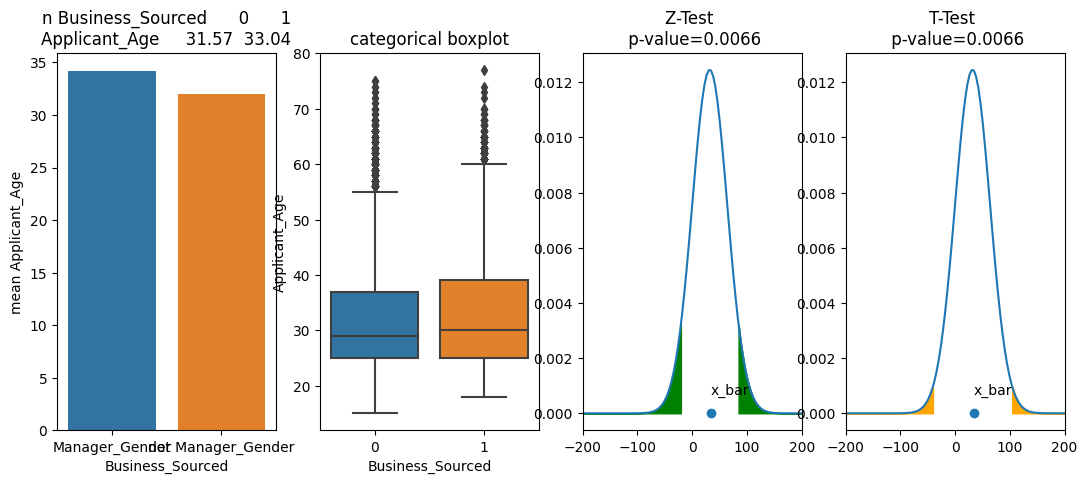

In [94]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Manager_Gender')

**OBSERVATION**
*   Applicant Age and Manager Gender have a significant Impact on Business Source.

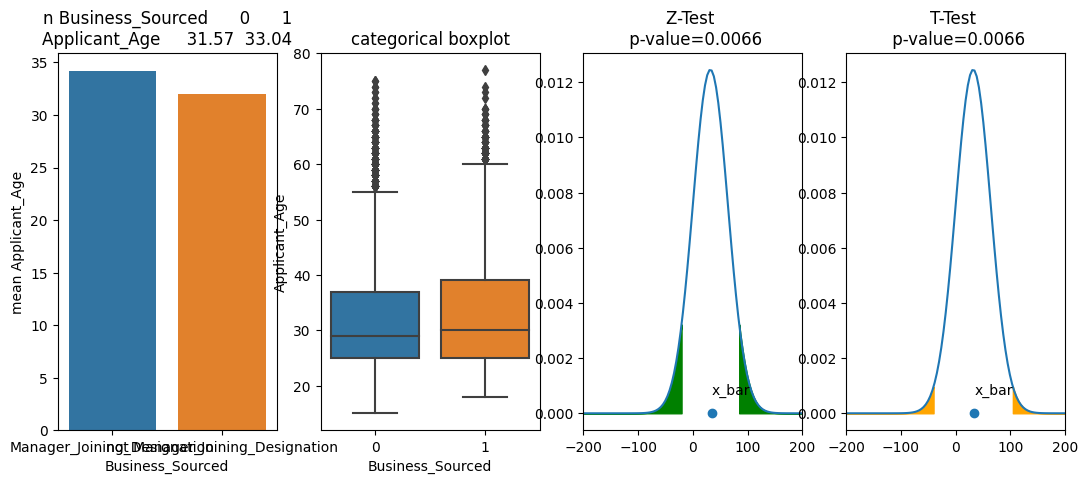

In [95]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Manager_Joining_Designation')

**OBSERVATION**
*   Applicant Age and Manager Joining Status have a significant impact on Business Source

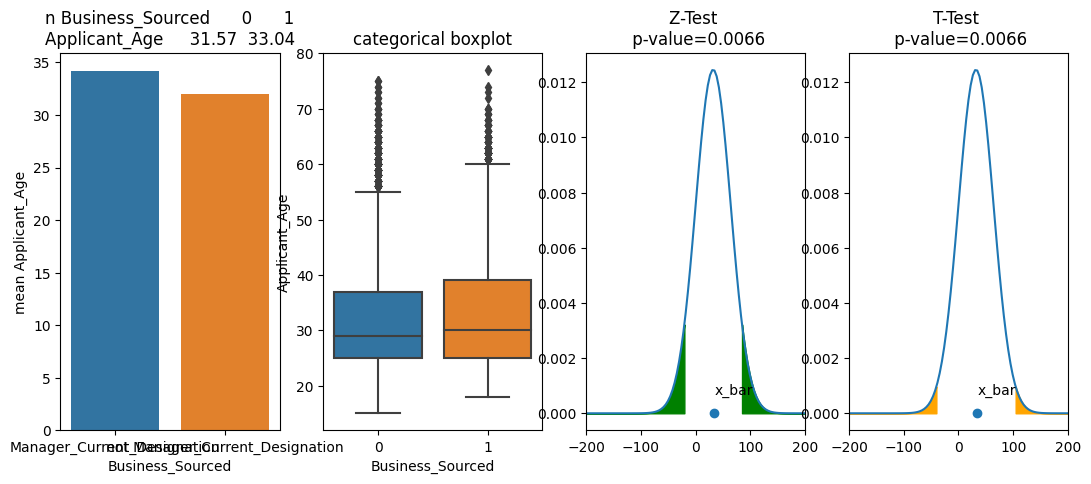

In [96]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Manager_Current_Designation')

**OBSERVATION**
*   Applicant Age and Manager Current Status have a significant impact on Business Source

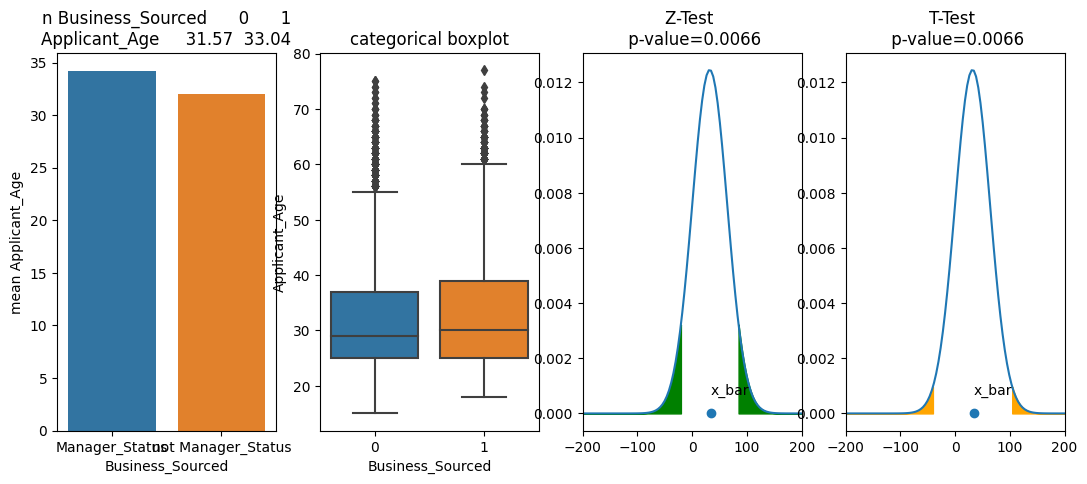

In [97]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Manager_Status')

**OBSERVATION**
*   Applicant Age and Manager Status have a significant impact on Business Source

In [120]:
Bivariate_cont_cat(df1, 'Manager_Business', 'Business_Sourced', 'Manager_Joining_Designation')

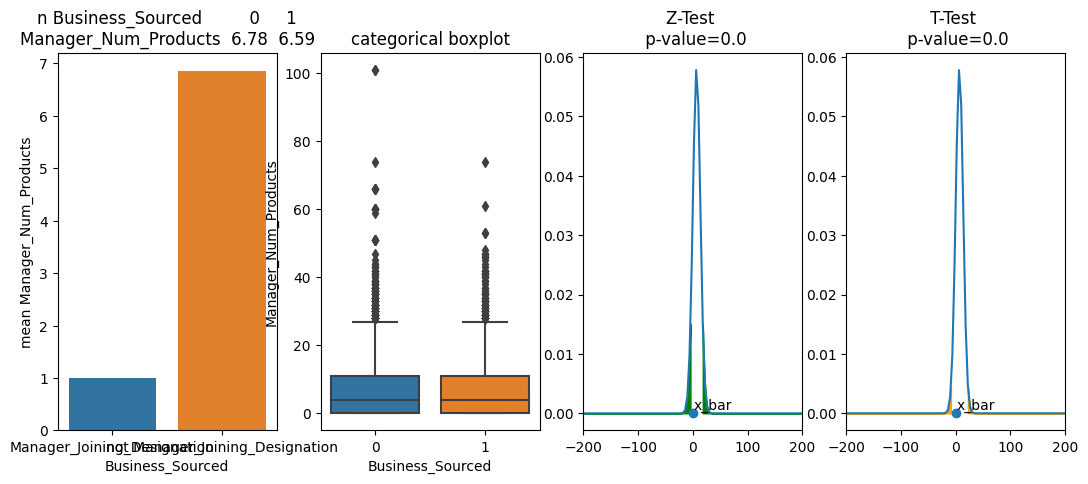

In [99]:
Bivariate_cont_cat(df1, 'Manager_Num_Products', 'Business_Sourced', 'Manager_Joining_Designation')

**OBERVATION:**
*   Manager Num_Product and Manager Joining Designation have a significant impact on Business Source

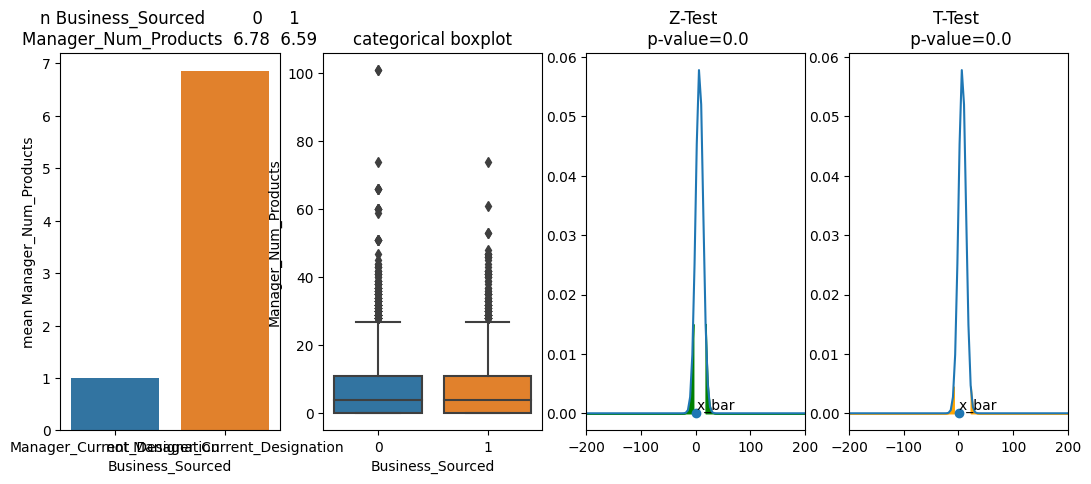

In [100]:
Bivariate_cont_cat(df1, 'Manager_Num_Products', 'Business_Sourced', 'Manager_Current_Designation')

OBSERVATION:
Manager Num_Product and Manager Current Designation have a significant impact on Business Source

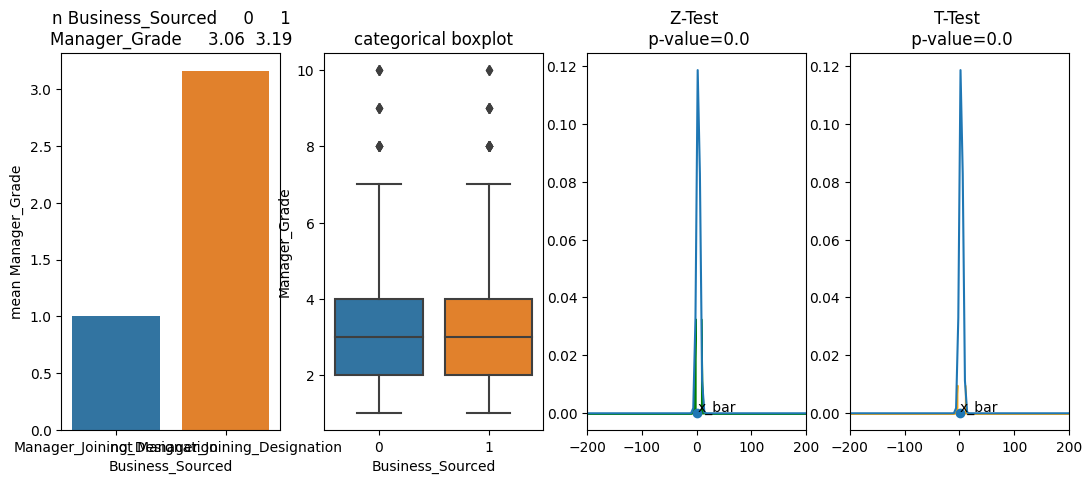

In [101]:
Bivariate_cont_cat(df1, 'Manager_Grade', 'Business_Sourced', 'Manager_Joining_Designation')

**OBSERVATION:**

Manager Grade and Manager Joining Designation have a significant impact on Business Source

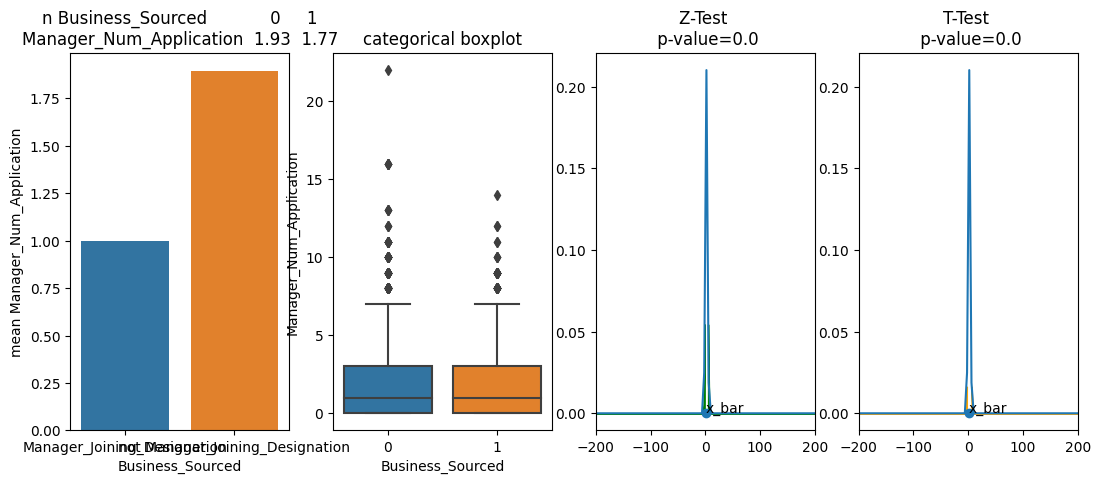

In [102]:
Bivariate_cont_cat(df1, 'Manager_Num_Application', 'Business_Sourced', 'Manager_Joining_Designation')

**OBSERVATION**

Manager Num Application and Manager Joining Designation have a significant impact on Business Source

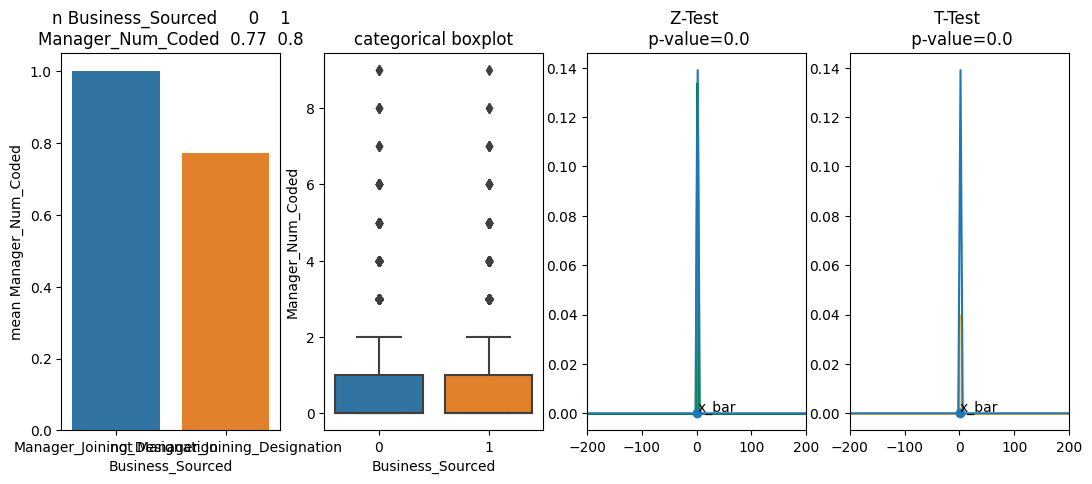

In [103]:
Bivariate_cont_cat(df1, 'Manager_Num_Coded', 'Business_Sourced', 'Manager_Joining_Designation')

In [104]:
#Bivariate_cont_cat(df1, 'Manager_Business', 'Business_Sourced', 'Applicant_Occupation')

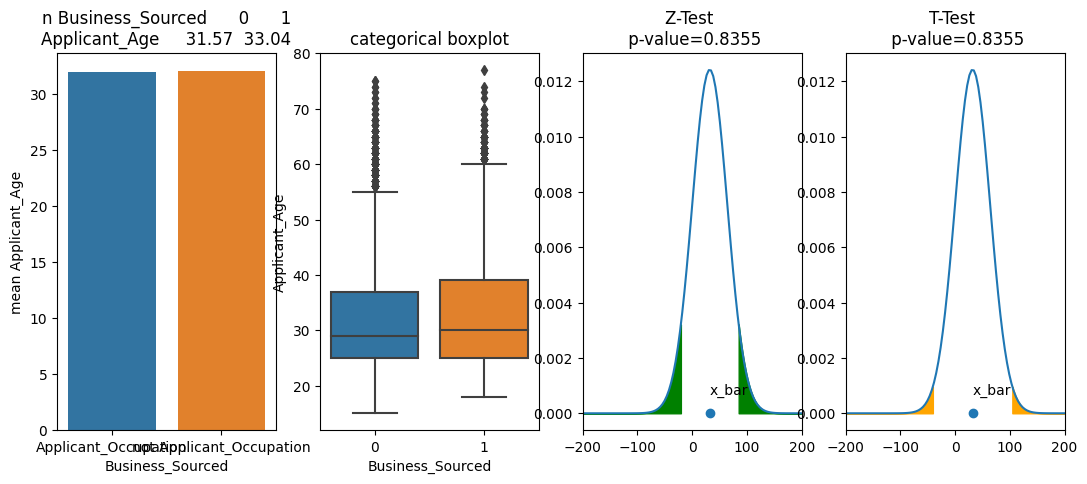

In [105]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Applicant_Occupation')

**OBSERVATION**
*   Applicant Age and Applicant Occupation does not have a significant impact on Business Source

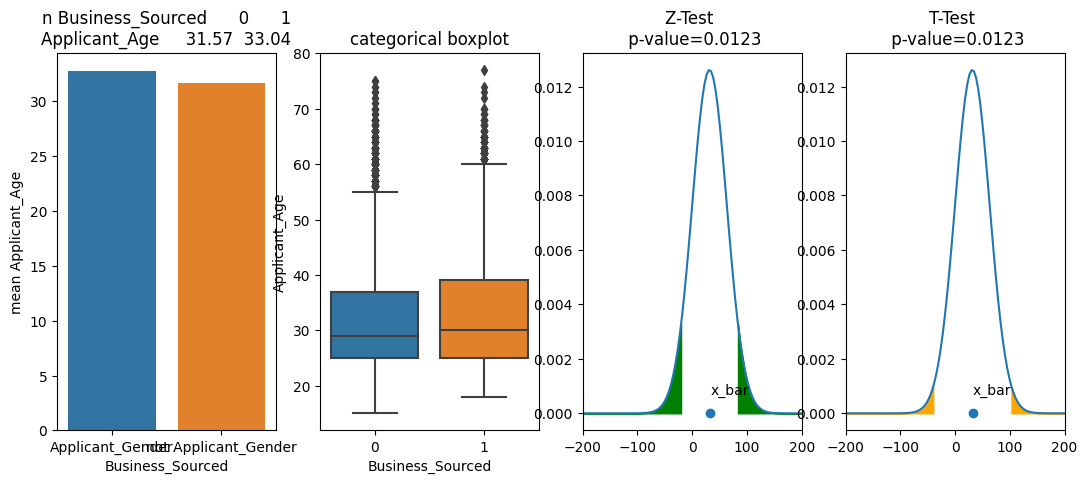

In [106]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Applicant_Gender')

**OBSERVATION:**
*   Applicant Age and Applicant Gender have a significant impact on Business Source

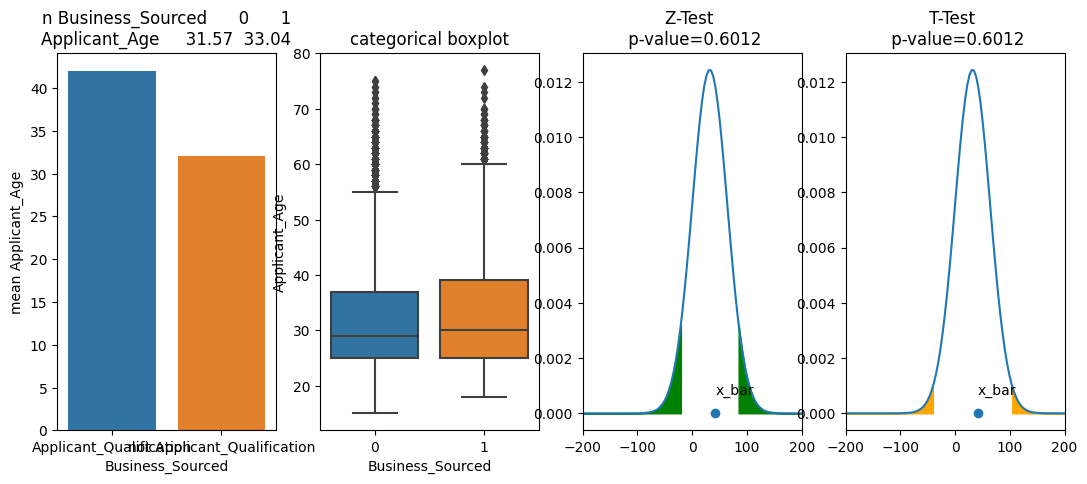

In [107]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Applicant_Qualification')

**OBSERVATION**
*   Applicant Age and Applicant Qualification does not have a significant impact on Business Source

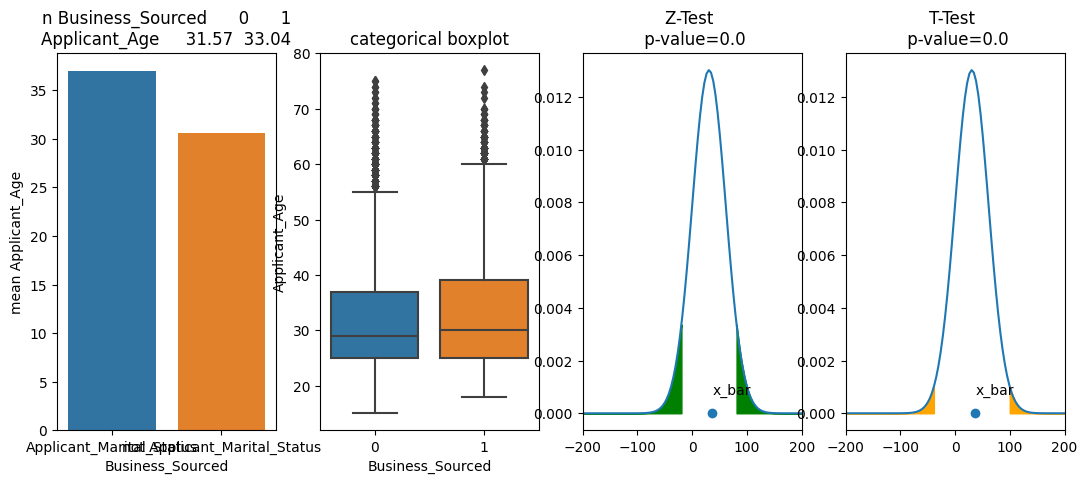

In [108]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Applicant_Marital_Status')

**OBSERVATION**
*   Applicant Age and Applicant Marital Status have a significant impact on Business Source

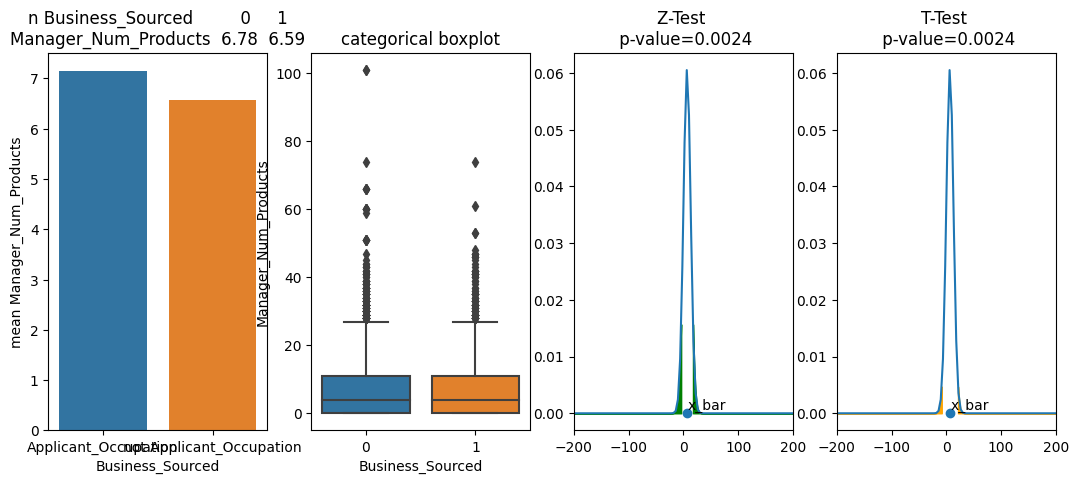

In [109]:
Bivariate_cont_cat(df1, 'Manager_Num_Products', 'Business_Sourced', 'Applicant_Occupation')

**OBSERVATION**
*   Num_Products and Applicant Occupation have a significant impact on Business Source

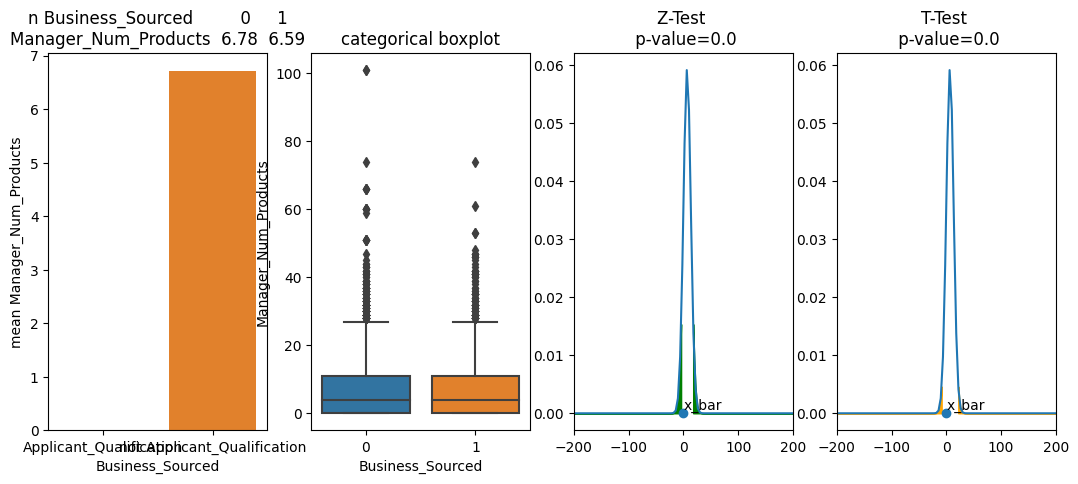

In [110]:
Bivariate_cont_cat(df1, 'Manager_Num_Products', 'Business_Sourced', 'Applicant_Qualification')

**OBSERVATION**
*   Num_Products and Applicant Qualification have a significant impact on Business Source

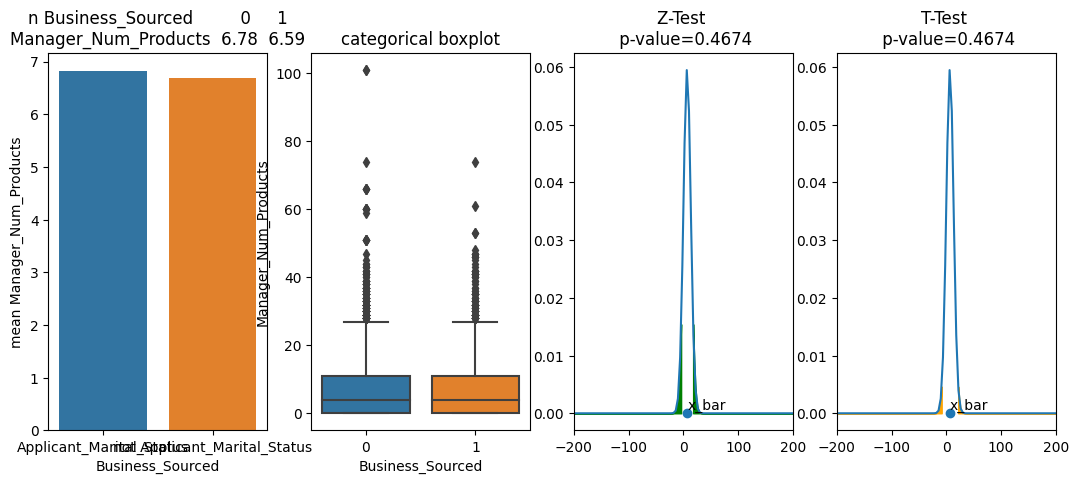

In [111]:
Bivariate_cont_cat(df1, 'Manager_Num_Products', 'Business_Sourced', 'Applicant_Marital_Status')

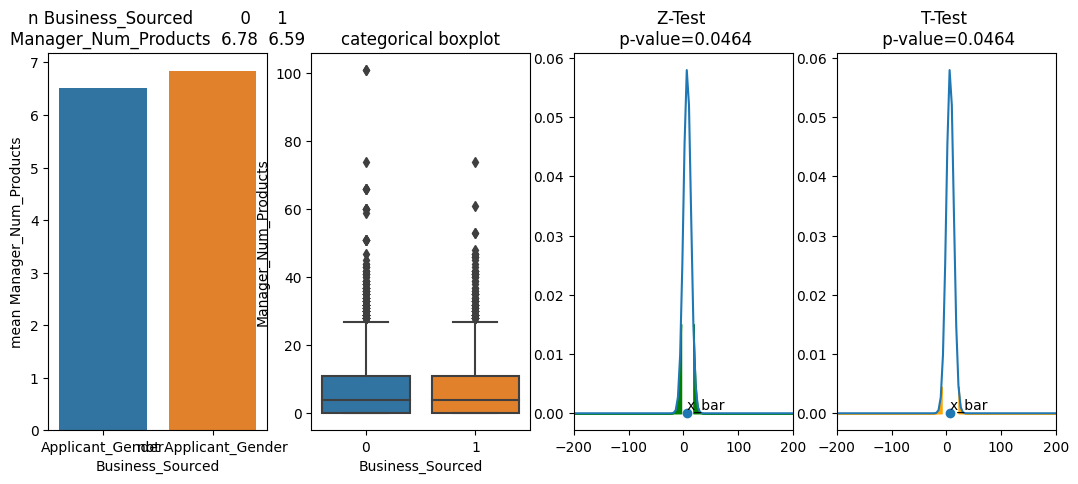

In [112]:
Bivariate_cont_cat(df1, 'Manager_Num_Products', 'Business_Sourced', 'Applicant_Gender')

**OBSERVATION**
*   Applicant Age and Manager Num Application have a significant impact on Business Source

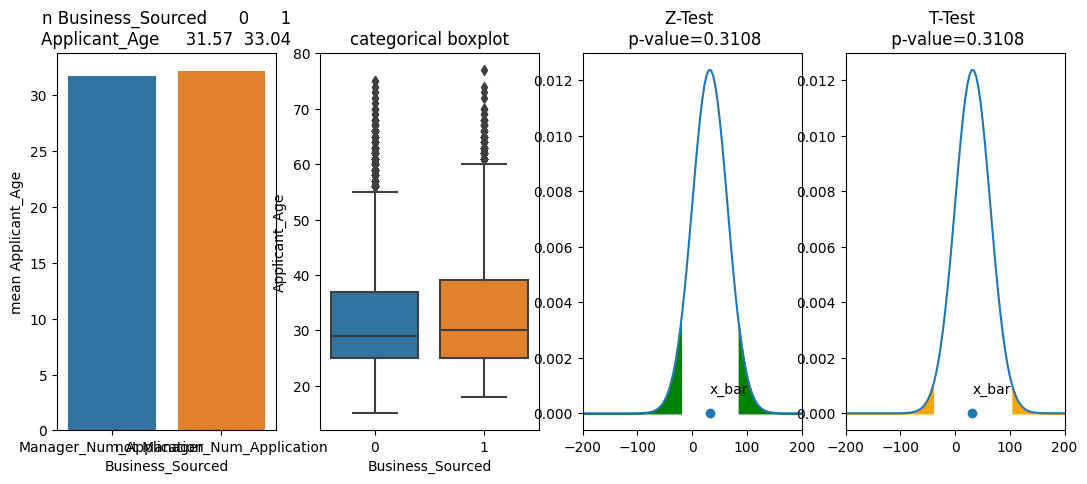

In [113]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Manager_Num_Application')

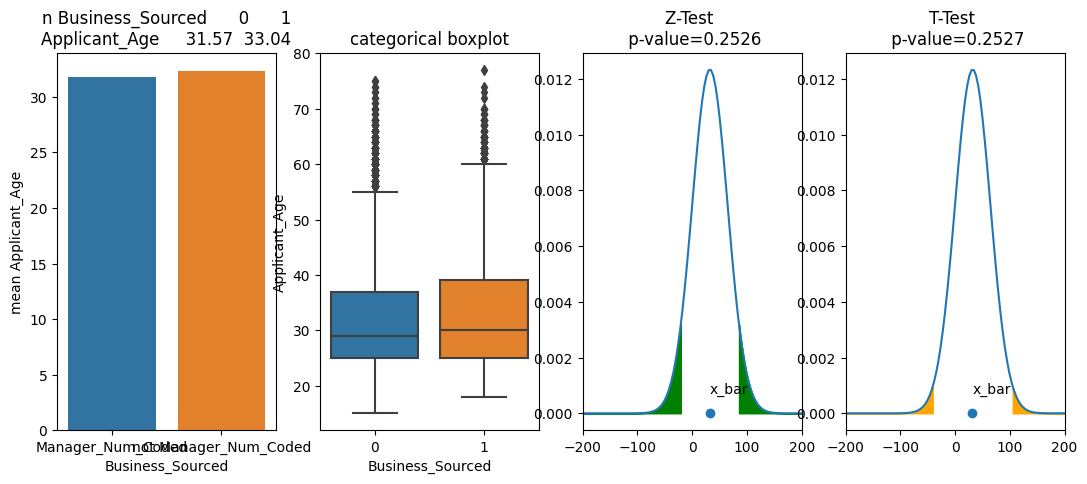

In [114]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Manager_Num_Coded')

OBSERVATION:
Applicant Age and Manager Num Coded does not have a significant impact on Business Source

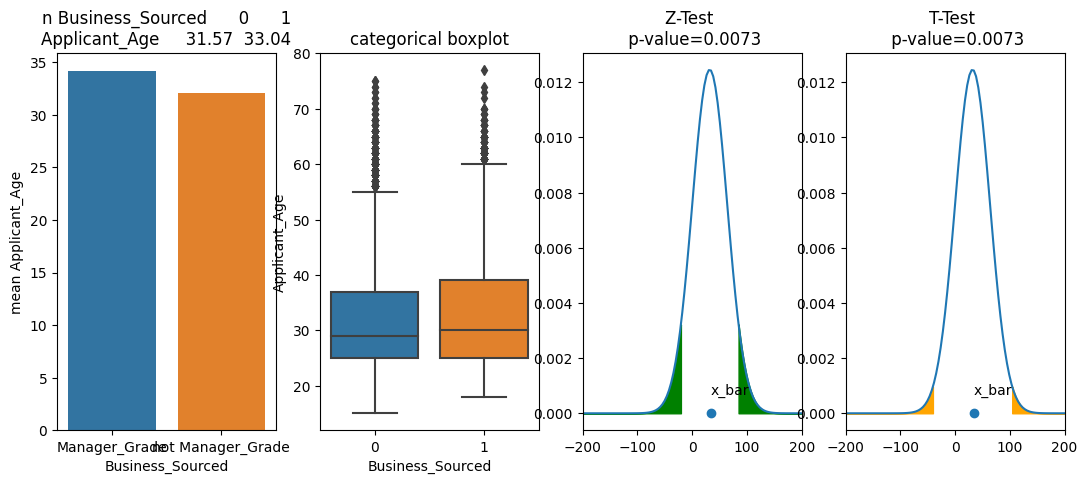

In [115]:
Bivariate_cont_cat(df1, 'Applicant_Age', 'Business_Sourced', 'Manager_Grade')

OBSERVATION:
*  Applicant Age and Manager Grade have a significant impact on Business Source

## **MULTIVARIATE ANALYSIS**

In [118]:
df.dtypes

ID                                   category
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                      int64
Applicant_Gender                     category
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status             category
Applicant_Occupation                 category
Applicant_Qualification              category
Manager_DOJ                          category
Manager_Joining_Designation          category
Manager_Current_Designation          category
Manager_Grade                           int64
Manager_Status                       category
Manager_Gender                       category
Manager_DoB                          category
Manager_Num_Application                 int64
Manager_Num_Coded                       int64
Manager_Business                        int64
Manager_Num_Products                    int64
Manager_Business2                       int64
Manager_Num_Products2             

In [123]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Applicant_Age_range'], 'Applicant_Occupation', aggfunc='mean')*100,3)

Applicant_Occupation                    Business  ...  Student
Applicant_Gender Applicant_Age_range              ...         
F                Middle-Aged Applicant    33.333  ...      NaN
                 Old-aged Applicant       30.769  ...    0.000
                 Young Applicant          35.484  ...   62.857
                 str                      36.316  ...   75.000
M                Middle-Aged Applicant    37.931  ...      NaN
                 Old-aged Applicant       42.073  ...      NaN
                 Young Applicant          29.787  ...   41.509
                 str                      33.520  ...   25.000

[8 rows x 5 columns]

In [158]:
round(df.pivot_table('Business_Sourced', ['Manager_Gender', 'Applicant_Age_range'], 'Applicant_Occupation', aggfunc='mean')*100,3)

Applicant_Occupation                  Business  Others  ...  Self Employed  Student
Manager_Gender Applicant_Age_range                      ...                        
1              Middle-Aged Applicant     0.000  50.000  ...            NaN      NaN
               Old-aged Applicant       83.333  33.333  ...            NaN      NaN
               Young Applicant          35.556  21.569  ...            0.0   50.000
               str                      37.209  37.349  ...            0.0  100.000
F              Middle-Aged Applicant    50.000   0.000  ...            NaN      NaN
               Old-aged Applicant       35.714  44.643  ...            0.0    0.000
               Young Applicant          38.298  42.593  ...            0.0   71.429
               str                      32.710  40.146  ...            0.0      NaN
M              Middle-Aged Applicant    39.130  41.176  ...            0.0      NaN
               Old-aged Applicant       38.000  46.250  ...            0.0      NaN
               Young Applicant          29.872  36.133  ...            0.0   48.052
               str                      33.761  35.092  ...            0.0   36.364

[12 rows x 5 columns]

In [125]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Applicant_Age_range'], 'Applicant_Qualification', aggfunc='mean')*100,3)

Applicant_Qualification                 Associate / Fellow of Institute of Chartered Accountans of India  ...  Professional Qualification in Marketing
Applicant_Gender Applicant_Age_range                                                                      ...                                         
F                Middle-Aged Applicant                                                NaN                 ...                                      NaN
                 Old-aged Applicant                                                   NaN                 ...                                      NaN
                 Young Applicant                                                      NaN                 ...                                      NaN
                 str                                                                  NaN                 ...                                    100.0
M                Middle-Aged Applicant                                                NaN                 ...                                      NaN
                 Old-aged Applicant                                                  50.0                 ...                                      NaN
                 Young Applicant                                                      0.0                 ...                                      NaN
                 str                                                                  NaN                 ...                                      NaN

[8 rows x 11 columns]

In [126]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Applicant_Age_range'], 'Applicant_Marital_Status', aggfunc='mean')*100,3)

Applicant_Marital_Status                   D       M       S      W
Applicant_Gender Applicant_Age_range                               
F                Middle-Aged Applicant   NaN  37.500     NaN    NaN
                 Old-aged Applicant      NaN  40.278  40.000   50.0
                 Young Applicant         NaN  35.912  39.138  100.0
                 str                    50.0  39.085  34.914    0.0
M                Middle-Aged Applicant   NaN  40.698  33.333    NaN
                 Old-aged Applicant      NaN  42.917  48.485    NaN
                 Young Applicant         NaN  29.245  32.035  100.0
                 str                    50.0  31.629  32.729    NaN

In [127]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Applicant_Age_range'], 'Manager_Grade', aggfunc='mean')*100,3)

Manager_Grade                               1       2   ...      9      10
Applicant_Gender Applicant_Age_range                    ...               
F                Middle-Aged Applicant   0.000  33.333  ...     NaN    NaN
                 Old-aged Applicant     55.556  50.000  ...     NaN    NaN
                 Young Applicant        31.373  24.841  ...     NaN    NaN
                 str                    41.379  34.602  ...  66.667  100.0
M                Middle-Aged Applicant  50.000  35.714  ...     NaN    NaN
                 Old-aged Applicant     47.368  36.601  ...   0.000    NaN
                 Young Applicant        28.485  29.564  ...     NaN    NaN
                 str                    32.476  31.203  ...  66.667   25.0

[8 rows x 10 columns]

In [128]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Applicant_Age_range'], 'Manager_Joining_Designation', aggfunc='mean')*100,3)

Manager_Joining_Designation                  1  Level 1  ...  Level 7    Other
Applicant_Gender Applicant_Age_range                     ...                  
F                Middle-Aged Applicant   0.000   50.000  ...      NaN  100.000
                 Old-aged Applicant     55.556   38.053  ...      NaN    0.000
                 Young Applicant        32.000   32.131  ...      NaN    0.000
                 str                    41.860   36.969  ...     50.0   28.571
M                Middle-Aged Applicant  50.000   44.444  ...      NaN    0.000
                 Old-aged Applicant     48.214   42.821  ...      NaN   66.667
                 Young Applicant        28.834   29.539  ...      NaN   18.750
                 str                    32.468   31.517  ...      NaN   22.727

[8 rows x 9 columns]

In [129]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Applicant_Age_range'], 'Manager_Current_Designation', aggfunc='mean')*100,3)

Manager_Current_Designation                  1  Level 1  ...  Level 4  Level 5
Applicant_Gender Applicant_Age_range                     ...                  
F                Middle-Aged Applicant   0.000   33.333  ...   25.000  100.000
                 Old-aged Applicant     55.556   50.000  ...   45.161   50.000
                 Young Applicant        32.000   24.684  ...   54.839   28.571
                 str                    41.860   34.483  ...   42.614   57.143
M                Middle-Aged Applicant  50.000   35.714  ...   60.000    0.000
                 Old-aged Applicant     48.214   36.364  ...   51.887   29.412
                 Young Applicant        28.834   29.469  ...   37.273   46.154
                 str                    32.468   31.208  ...   36.869   30.556

[8 rows x 6 columns]

In [130]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Business'], 'Manager_Grade', aggfunc='mean')*100,3)

Manager_Grade                                1       2   ...       9      10
Applicant_Gender Cat_Manager_Business                    ...                
F                High_Amount_Sourced        NaN  29.630  ...      NaN    NaN
                 Highest_Amount_Sourced     NaN  66.667  ...  100.000    NaN
                 Low_Amount_Sourced      39.041  31.818  ...   50.000    NaN
                 Medium_Amount_Sourced    0.000  30.973  ...      NaN  100.0
M                High_Amount_Sourced        NaN  32.231  ...      NaN   50.0
                 Highest_Amount_Sourced     NaN  48.980  ...      NaN    NaN
                 Low_Amount_Sourced      33.333  32.320  ...   33.333    NaN
                 Medium_Amount_Sourced   16.667  26.889  ...  100.000    0.0

[8 rows x 10 columns]

OBSERVATION:

Female Applicant have manager of grade 2 of highest_Amount_Sourced while male applicant have manager of grade 8 of low amount sourced high.

In [131]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Business'], 'Manager_Gender', aggfunc='mean')*100,3)

Manager_Gender                                1       F       M
Applicant_Gender Cat_Manager_Business                          
F                High_Amount_Sourced        NaN  52.000  43.258
                 Highest_Amount_Sourced     NaN  41.176  45.385
                 Low_Amount_Sourced      39.041  39.035  36.493
                 Medium_Amount_Sourced      NaN  41.803  34.430
M                High_Amount_Sourced        NaN  36.232  36.234
                 Highest_Amount_Sourced     NaN  38.614  40.402
                 Low_Amount_Sourced      33.333  38.416  32.785
                 Medium_Amount_Sourced      NaN  28.492  29.409

In [132]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Business'], 'Applicant_Occupation', aggfunc='mean')*100,3)

Applicant_Occupation                     Business  ...  Student
Applicant_Gender Cat_Manager_Business              ...         
F                High_Amount_Sourced       36.364  ...   50.000
                 Highest_Amount_Sourced    50.000  ...   60.000
                 Low_Amount_Sourced        34.118  ...   60.000
                 Medium_Amount_Sourced     33.663  ...   75.000
M                High_Amount_Sourced       34.225  ...   40.000
                 Highest_Amount_Sourced    36.154  ...   50.000
                 Low_Amount_Sourced        36.286  ...   37.500
                 Medium_Amount_Sourced     27.150  ...   38.889

[8 rows x 5 columns]

In [133]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Business'], 'Applicant_Qualification', aggfunc='mean')*100,3)

Applicant_Qualification                  Associate / Fellow of Institute of Chartered Accountans of India  ...  Professional Qualification in Marketing
Applicant_Gender Cat_Manager_Business                                                                      ...                                         
F                High_Amount_Sourced                                                   NaN                 ...                                      NaN
                 Highest_Amount_Sourced                                                NaN                 ...                                      NaN
                 Low_Amount_Sourced                                                    NaN                 ...                                      NaN
                 Medium_Amount_Sourced                                                 NaN                 ...                                    100.0
M                High_Amount_Sourced                                                   NaN                 ...                                      NaN
                 Highest_Amount_Sourced                                                NaN                 ...                                      NaN
                 Low_Amount_Sourced                                                 33.333                 ...                                      NaN
                 Medium_Amount_Sourced                                                 NaN                 ...                                      NaN

[8 rows x 11 columns]

In [134]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Business'], 'Manager_Status', aggfunc='mean')*100,3)

Manager_Status                                1  Confirmation  Probation
Applicant_Gender Cat_Manager_Business                                   
F                High_Amount_Sourced        NaN        44.813     66.667
                 Highest_Amount_Sourced     NaN        43.723      0.000
                 Low_Amount_Sourced      39.041        24.280     40.772
                 Medium_Amount_Sourced      NaN        35.327     44.186
M                High_Amount_Sourced        NaN        35.838     66.667
                 Highest_Amount_Sourced     NaN        40.183     25.000
                 Low_Amount_Sourced      33.333        27.062     35.287
                 Medium_Amount_Sourced      NaN        28.848     37.008

In [135]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Business'], 'Applicant_Marital_Status', aggfunc='mean')*100,3)

Applicant_Marital_Status                     D       M       S      W
Applicant_Gender Cat_Manager_Business                                
F                High_Amount_Sourced       NaN  41.618  55.000    NaN
                 Highest_Amount_Sourced    NaN  39.506  52.857    NaN
                 Low_Amount_Sourced       50.0  38.739  34.703    0.0
                 Medium_Amount_Sourced     NaN  37.430  33.333   50.0
M                High_Amount_Sourced       0.0  36.346  36.126    NaN
                 Highest_Amount_Sourced    NaN  41.351  37.430    NaN
                 Low_Amount_Sourced      100.0  33.674  32.718  100.0
                 Medium_Amount_Sourced     NaN  29.101  29.825    NaN

In [136]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Num_Products'], 'Applicant_Occupation', aggfunc='mean')*100,3)

Applicant_Occupation                   Business  Others  ...  Self Employed  Student
Applicant_Gender Cat_Num_Products                        ...                        
F                Higher_Products_Sold    80.000   0.000  ...            NaN    0.000
                 Less_Products_Sold      35.656  41.026  ...            0.0   64.706
                 Medium_Products_Sold    32.979  47.712  ...            0.0   60.000
M                Higher_Products_Sold    30.556  41.176  ...            0.0    0.000
                 Less_Products_Sold      33.842  34.642  ...            0.0   41.667
                 Medium_Products_Sold    31.950  33.523  ...            0.0   33.333

[6 rows x 5 columns]

In [137]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Num_Products'], 'Applicant_Qualification', aggfunc='mean')*100,3)

Applicant_Qualification                Associate / Fellow of Institute of Chartered Accountans of India  ...  Professional Qualification in Marketing
Applicant_Gender Cat_Num_Products                                                                        ...                                         
F                Higher_Products_Sold                                                NaN                 ...                                      NaN
                 Less_Products_Sold                                                  NaN                 ...                                    100.0
                 Medium_Products_Sold                                                NaN                 ...                                      NaN
M                Higher_Products_Sold                                                NaN                 ...                                      NaN
                 Less_Products_Sold                                               33.333                 ...                                      NaN
                 Medium_Products_Sold                                                NaN                 ...                                      NaN

[6 rows x 11 columns]

In [138]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Num_Products'], 'Applicant_Marital_Status', aggfunc='mean')*100,3)

Applicant_Marital_Status                   D       M       S      W
Applicant_Gender Cat_Num_Products                                  
F                Higher_Products_Sold    NaN  38.889  28.571    NaN
                 Less_Products_Sold     50.0  39.539  35.265   50.0
                 Medium_Products_Sold    NaN  36.420  46.632    0.0
M                Higher_Products_Sold    NaN  36.893  30.000    NaN
                 Less_Products_Sold    100.0  33.170  32.890  100.0
                 Medium_Products_Sold    0.0  32.805  31.434    NaN

In [139]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Num_Products'], 'Manager_Current_Designation', aggfunc='mean')*100,3)

Manager_Current_Designation                 1  Level 1  ...  Level 4  Level 5
Applicant_Gender Cat_Num_Products                       ...                  
F                Higher_Products_Sold     NaN    0.000  ...   57.143   75.000
                 Less_Products_Sold    39.041   32.212  ...   52.201   54.545
                 Medium_Products_Sold     NaN   32.836  ...   39.130   36.364
M                Higher_Products_Sold     NaN   28.571  ...   31.250   27.273
                 Less_Products_Sold    33.333   31.563  ...   42.582   34.615
                 Medium_Products_Sold     NaN   29.282  ...   36.556   33.333

[6 rows x 6 columns]

In [140]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Num_Products'], 'Manager_Joining_Designation', aggfunc='mean')*100,3)

Manager_Joining_Designation                 1  Level 1  ...  Level 7  Other
Applicant_Gender Cat_Num_Products                       ...                
F                Higher_Products_Sold     NaN   17.647  ...      NaN    NaN
                 Less_Products_Sold    39.041   35.673  ...     50.0   20.0
                 Medium_Products_Sold     NaN   37.037  ...      NaN    0.0
M                Higher_Products_Sold     NaN   33.645  ...      NaN    NaN
                 Less_Products_Sold    33.333   32.934  ...      NaN   22.5
                 Medium_Products_Sold     NaN   31.009  ...      NaN   50.0

[6 rows x 9 columns]

In [141]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Num_Products'], 'Manager_Gender', aggfunc='mean')*100,3)

Manager_Gender                              1       F       M
Applicant_Gender Cat_Num_Products                            
F                Higher_Products_Sold     NaN  25.000  38.095
                 Less_Products_Sold    39.041  41.711  36.864
                 Medium_Products_Sold     NaN  42.953  39.024
M                Higher_Products_Sold     NaN  18.182  36.364
                 Less_Products_Sold    33.333  37.077  32.543
                 Medium_Products_Sold     NaN  30.508  32.492

In [142]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Num_Products'], 'Manager_Gender', aggfunc='mean')*100,3)

Manager_Gender                              1       F       M
Applicant_Gender Cat_Num_Products                            
F                Higher_Products_Sold     NaN  25.000  38.095
                 Less_Products_Sold    39.041  41.711  36.864
                 Medium_Products_Sold     NaN  42.953  39.024
M                Higher_Products_Sold     NaN  18.182  36.364
                 Less_Products_Sold    33.333  37.077  32.543
                 Medium_Products_Sold     NaN  30.508  32.492

In [143]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Num_Coded'], 'Applicant_Occupation', aggfunc='mean')*100,3)

Applicant_Occupation                    Business  ...  Student
Applicant_Gender Cat_Manager_Num_Coded            ...         
F                High                     50.000  ...   83.333
                 Low                      34.385  ...   58.824
M                High                     29.787  ...   62.500
                 Low                      33.590  ...   35.849

[4 rows x 5 columns]

In [144]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Num_Coded'], 'Applicant_Qualification', aggfunc='mean')*100,3)

Applicant_Qualification                 Associate / Fellow of Institute of Chartered Accountans of India  ...  Professional Qualification in Marketing
Applicant_Gender Cat_Manager_Num_Coded                                                                    ...                                         
F                High                                                                 NaN                 ...                                      NaN
                 Low                                                                  NaN                 ...                                    100.0
M                High                                                               100.0                 ...                                      NaN
                 Low                                                                  0.0                 ...                                      NaN

[4 rows x 11 columns]

In [145]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Num_Coded'], 'Applicant_Marital_Status', aggfunc='mean')*100,3)

Applicant_Marital_Status                   D       M       S      W
Applicant_Gender Cat_Manager_Num_Coded                             
F                High                    NaN  40.645  54.054    NaN
                 Low                    50.0  38.631  36.301   40.0
M                High                    NaN  32.609  31.694    NaN
                 Low                    50.0  33.211  32.588  100.0

In [146]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Num_Coded'], 'Manager_Gender', aggfunc='mean')*100,3)

Manager_Gender                               1       F       M
Applicant_Gender Cat_Manager_Num_Coded                        
F                High                      NaN  48.352  42.754
                 Low                    39.041  40.596  36.871
M                High                      NaN  41.509  30.346
                 Low                    33.333  34.589  32.815

In [147]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Num_Coded'], 'Manager_Current_Designation', aggfunc='mean')*100,3)

Manager_Current_Designation                  1  Level 1  ...  Level 4  Level 5
Applicant_Gender Cat_Manager_Num_Coded                   ...                  
F                High                      NaN   40.000  ...   47.368   57.143
                 Low                    39.041   31.435  ...   46.241   47.368
M                High                      NaN   22.280  ...   47.059   71.429
                 Low                    33.333   32.075  ...   38.318   28.333

[4 rows x 6 columns]

In [148]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Manager_Num_Coded'], 'Manager_Joining_Designation', aggfunc='mean')*100,3)

Manager_Joining_Designation                  1  Level 1  ...  Level 7  Other
Applicant_Gender Cat_Manager_Num_Coded                   ...                
F                High                      NaN   45.902  ...      NaN    NaN
                 Low                    39.041   34.276  ...     50.0  18.75
M                High                      NaN   28.701  ...      NaN   0.00
                 Low                    33.333   32.673  ...      NaN  24.39

[4 rows x 9 columns]

In [149]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Application_Sourced'], 'Applicant_Occupation', aggfunc='mean')*100,3)

Applicant_Occupation                         Business  ...  Student
Applicant_Gender Cat_Application_Sourced               ...         
F                High_Application_Sourced      26.087  ...  100.000
                 Less_Application_Sourced      35.294  ...   58.621
                 Medium_Application_Sourced    39.024  ...   70.000
M                High_Application_Sourced      25.581  ...   80.000
                 Less_Application_Sourced      34.874  ...   40.476
                 Medium_Application_Sourced    30.717  ...   21.429

[6 rows x 5 columns]

In [150]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Application_Sourced'], 'Applicant_Qualification', aggfunc='mean')*100,3)

Applicant_Qualification                      Associate / Fellow of Institute of Chartered Accountans of India  ...  Professional Qualification in Marketing
Applicant_Gender Cat_Application_Sourced                                                                       ...                                         
F                High_Application_Sourced                                                  NaN                 ...                                      NaN
                 Less_Application_Sourced                                                  NaN                 ...                                      NaN
                 Medium_Application_Sourced                                                NaN                 ...                                    100.0
M                High_Application_Sourced                                                  NaN                 ...                                      NaN
                 Less_Application_Sourced                                                  0.0                 ...                                      NaN
                 Medium_Application_Sourced                                               50.0                 ...                                      NaN

[6 rows x 11 columns]

In [151]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Application_Sourced'], 'Applicant_Marital_Status', aggfunc='mean')*100,3)

Applicant_Marital_Status                         D       M       S      W
Applicant_Gender Cat_Application_Sourced                                 
F                High_Application_Sourced      0.0  28.090  32.203    NaN
                 Less_Application_Sourced      NaN  39.780  38.727   40.0
                 Medium_Application_Sourced  100.0  38.903  37.436    NaN
M                High_Application_Sourced      NaN  29.618  27.778    NaN
                 Less_Application_Sourced    100.0  33.741  33.296  100.0
                 Medium_Application_Sourced    0.0  32.403  31.273    NaN

In [152]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Application_Sourced'], 'Manager_Gender', aggfunc='mean')*100,3)

Manager_Gender                                    1       F       M
Applicant_Gender Cat_Application_Sourced                           
F                High_Application_Sourced       NaN  32.000  28.283
                 Less_Application_Sourced    39.041  41.765  38.707
                 Medium_Application_Sourced     NaN  45.985  36.199
M                High_Application_Sourced       NaN  41.667  27.136
                 Less_Application_Sourced    33.333  35.426  33.454
                 Medium_Application_Sourced     NaN  34.239  31.732

In [153]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Application_Sourced'], 'Manager_Current_Designation', aggfunc='mean')*100,3)

Manager_Current_Designation                       1  Level 1  ...  Level 4  Level 5
Applicant_Gender Cat_Application_Sourced                      ...                  
F                High_Application_Sourced       NaN   21.875  ...   45.000  100.000
                 Less_Application_Sourced    39.041   32.588  ...   45.370   42.105
                 Medium_Application_Sourced     NaN   33.813  ...   50.000   60.000
M                High_Application_Sourced       NaN   23.699  ...   41.667   40.000
                 Less_Application_Sourced    33.333   32.205  ...   39.798   32.000
                 Medium_Application_Sourced     NaN   30.832  ...   37.500   33.333

[6 rows x 6 columns]

In [154]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Application_Sourced'], 'Manager_Joining_Designation', aggfunc='mean')*100,3)

Manager_Joining_Designation                       1  Level 1  ...  Level 7   Other
Applicant_Gender Cat_Application_Sourced                      ...                 
F                High_Application_Sourced       NaN   28.169  ...      NaN     NaN
                 Less_Application_Sourced    39.041   34.691  ...     50.0  16.667
                 Medium_Application_Sourced     NaN   39.860  ...      NaN  25.000
M                High_Application_Sourced       NaN   25.681  ...      NaN     NaN
                 Less_Application_Sourced    33.333   33.187  ...      NaN  30.000
                 Medium_Application_Sourced     NaN   31.783  ...      NaN   8.333

[6 rows x 9 columns]

In [155]:
round(df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Cat_Application_Sourced'], 'Manager_Gender', aggfunc='mean')*100,3)

Manager_Gender                                    1       F       M
Applicant_Gender Cat_Application_Sourced                           
F                High_Application_Sourced       NaN  32.000  28.283
                 Less_Application_Sourced    39.041  41.765  38.707
                 Medium_Application_Sourced     NaN  45.985  36.199
M                High_Application_Sourced       NaN  41.667  27.136
                 Less_Application_Sourced    33.333  35.426  33.454
                 Medium_Application_Sourced     NaN  34.239  31.732

## CONCLUSION

From the EDA Process,
*   Applicant Gender,Applicant Occupation,Manager Num_Application, Applicant Age, Manager Num_Products,Manager Grade,Manager Business and Manager_Num_Coded play a significant role and impact Business Sourced Target Variable.
*  Manager_Current_Designation,Manager_Joining_Designation,Applicant MArital_Status,Applicant_Qualification,Manager Gender, Manager Status Does not impact Business Source.
*  More emphasis on Student,young female is given highest preference over other candidates.
*  High Preference of Female candidates of manager who are female,medium application sourced,high Cat_Manager_Num_Coded managers.
